# Progettazione del compensatore

Da questo quaderno in poi affronteremo la progettazione del sistema di controllo. Sfrutteremo le conoscenze che abbiamo stabilito sui vari tipi di controller, sull'hardware comunemente utilizzato e su altri aspetti dell'argomento di cui abbiamo discusso.

Ora, quando dico progettazione di sistemi di controllo, intendo un ombrello molto grande. Sotto questo ombrello consideriamo la scelta dell'impianto, la scelta dei sensori per il sistema e molte altre decisioni basate non solo sui requisiti prestazionali ma anche su considerazioni economiche e di altro tipo.

Tuttavia, in questo corso presupponiamo che tutte le altre decisioni siano già state prese, poiché le considerazioni sulla selezione dell'impianto, sulla scelta del sensore e sul tipo di controller sono ampiamente diverse e vanno oltre lo scopo di una discussione in classe. Ci concentreremo principalmente sulla progettazione dei compensatori.

## Cos'è un compensatore?

Un compensatore è un componente del sistema di controllo totale progettato per compensare le carenze dell'impianto. Se un sistema di controllo con impianto, sensore e circuito di feedback soddisfa le vostre esigenze, non avete bisogno di alcun compenso. Tuttavia, in caso contrario, viene aggiunto un compensatore, un dispositivo hardware o software in un computer digitale, per migliorare le prestazioni.

Con riferimento all'immagine qui sotto:

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_system.png" alt="22_Compensator_Design_Using_Root_Locus_system
" style="width:450px;"/>
</tr></table>

Se non viene incluso il controller $D(s)$, lo schema rappresenta comunque un sistema di controllo completo. Se questo soddisfa le tue esigenze, non è necessario alcun ulteriore compenso.

Il nostro obiettivo primario è progettare un compensatore efficace, rappresentato come $ D(s) $ nella terminologia della funzione di trasferimento, per garantire che il nostro sistema di controllo aderisca a specifici criteri di prestazione.

Procederemo partendo dal presupposto che l’architettura fondamentale del sistema rimanga costante. Ciò implica che elementi come l'impianto ed il sensore non subiranno alcuna modifica. L'unica variabile suscettibile di alterazione è il compensatore, $ D(s) $. Questa restrizione si basa sulla relativa semplicità della modifica di $ D(s) $: di solito comporta l'aggiornamento del software nei controller digitali o la regolazione del circuito dell'amplificatore operazionale (OpAmp).

Nel campo dei sistemi di controllo, un compensatore gioca un ruolo fondamentale. Serve a regolare il comportamento del sistema per soddisfare le specifiche mirate, che possono includere stabilità migliorata, tempi di risposta più rapidi o errori di stato stazionario ridotti. In sostanza, un compensatore mette a punto le dinamiche del sistema per ottenere i risultati desiderati.

Per illustrare, si consideri un sistema di controllo dotato di un circuito di feedback di base. Qualora questo sistema non riuscisse a soddisfare i suoi parametri di riferimento prestazionali, introduciamo un compensatore. Ad esempio, in uno scenario in cui la risposta del sistema è più lenta del necessario, è possibile progettare un compensatore appositamente per accelerare i tempi di risposta del sistema.

# Metodo del luogo delle radici in ingegneria dei controlli

## Introduzione al metodo del luogo delle radici

Il metodo del luogo delle radici è un approccio grafico utilizzato nei sistemi di controllo per determinare la stabilità e la risposta transitoria di un sistema in funzione di un parametro variabile, tipicamente un guadagno.

### Indicatori chiave delle prestazioni: tradurre le prestazioni in poli

Ricordiamo le principali misure di prestazione nei sistemi di controllo:

1. **$T_r$** (Tempo di salita)
2. **$T_p$** (Ora di punta)
3. **$\zeta$** (rapporto di smorzamento)
4. **$\omega_n$** (Frequenza naturale)
5. **$M_p$** (Picco massimo)
6. Tempo di assestamento
7. Errore allo stato stazionario

Abbiamo osservato che le misure di performance spesso presentano conflitti; tuttavia, la risposta transitoria del sistema è governata principalmente da due parametri chiave: $\zeta$ (rapporto di smorzamento) e $\omega_n$ (frequenza naturale). Questi parametri influenzano le prestazioni del sistema, poiché determinano il comportamento del sistema durante gli stati transitori, quei periodi temporanei prima di raggiungere lo stato stazionario.

Di conseguenza, comprendere e controllare la risposta transitoria si traduce nel posizionamento strategico di una coppia di poli dominanti a circuito chiuso nel piano s. In sostanza, i parametri $\zeta$ e $\omega_n$ sono importanti nel definire le prestazioni complessive di un sistema di controllo.

Il metodo del luogo delle radici prevede di tracciare le possibili posizioni (luogo) dei poli del sistema a circuito chiuso al variare di un parametro del sistema (solitamente un guadagno). Questo grafico aiuta a visualizzare come i poli del circuito chiuso si muovono in risposta ai cambiamenti di questo parametro.

## Comprensione del diagramma del luogo delle radici

Consideriamo un sistema con la funzione di trasferimento ad anello aperto

$$G(s) = \frac{K}{(s + 1)(s + 2)}$$

dove $K$ è un **guadagno variabile**.


Ciò corrisponde a

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_1.png" alt="22_Compensator_Design_Using_Root_Locus_example_1
" style="width:450px;"/>
</tr></table>

**Passaggio 1: derivare la funzione di trasferimento ad anello chiuso**

La funzione di trasferimento ad anello chiuso è data da:

$$ \frac{Y(s)}{R(s)} = \frac{K}{s^2 + 3s + 2 + K} $$

**Passaggio 2: determinare la posizione dei poli**

Le radici delle equazioni caratteristiche sono:

$$
s_{1,2} = \frac{-3}{2} \pm \frac{1}{2}\sqrt{1-4K}
$$

Ora possiamo verificare come si comporta il sistema quando cambiamo $K$ da 0 a $\infty$. Dopotutto questo è il cambiamento totale che possiamo apportare.

Per valori diversi di K cambiano i poli del circuito chiuso, che sono le radici dell'equazione caratteristica.

- Inizialmente, quando K = 0, i poli si trovano nelle posizioni dei poli ad anello aperto, -1 e -2.

- All'aumentare di K, questi poli si muovono lungo percorsi specifici nel piano s. Questo movimento può essere tracciato e analizzato.

- Ad esempio, considera $K = 1/4$:

$$ s_{1,2} = -\frac{3}{2} \pm \frac{1}{2}\sqrt{1 - 4K} $$
$$ = -1.5 \text{ (poli ripetuti)} $$

Man mano che $K$ aumenta ulteriormente, i poli diventano complessi coniugati.

### Visualizzandolo in Python

Per illustrare come si muovono i poli di un sistema al variare del parametro $K$, possiamo scrivere uno script Python.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to calculate and plot poles for a given K
def plot_poles(K):
    discriminant = 1 - 4 * K

    # Check if the discriminant is negative (complex poles)
    if discriminant < 0:
        real_part = -1.5
        imaginary_part = 0.5 * np.sqrt(-discriminant)
        poles = [real_part + 1j * imaginary_part, real_part - 1j * imaginary_part]
    else:
        # Real poles
        poles = [-1.5 + 0.5 * np.sqrt(discriminant), -1.5 - 0.5 * np.sqrt(discriminant)]

    # Clear the previous plot
    plt.clf()

    # Plot the poles
    for pole in poles:
        plt.plot(np.real(pole), np.imag(pole), 'bo')  # Blue dots for poles

    plt.xlim(-3, 1)
    plt.ylim(-2, 2)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(f'Movement of Poles for K = {K}')
    plt.grid(True)
    plt.axhline(0, color='black')  # X-axis
    plt.axvline(0, color='black')  # Y-axis
    plt.show()

# Create an interactive slider for K
interact(plot_poles, K=FloatSlider(value=0, min=0, max=1, step=0.01, description='Gain K:'))


interactive(children=(FloatSlider(value=0.0, description='Gain K:', max=1.0, step=0.01), Output()), _dom_class…

<function __main__.plot_poles(K)>

Possiamo visualizzarlo graficamente in questo modo:

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_2.png" alt="22_Compensator_Design_Using_Root_Locus_example_2
" style="width:450px;"/>
</tr></table>


Ricorda che i poli sono:

$$
s_{1,2} = -\frac{3}{2} \pm \frac{1}{2}\sqrt{1-4K}.
$$

- Nel diagramma del luogo delle radici di questo sistema, vediamo due rami che iniziano rispettivamente a -1 e -2 sull'asse reale.
- All'aumentare di $ K $, questi rami convergerebbero verso -1,5.
- Oltre $ K = \frac{1}{4} $, i rami si spezzano nelle metà superiore e inferiore del piano complesso, formando un'immagine speculare rispetto all'asse reale.
- I rami continuano verticalmente rispettivamente verso l'alto e verso il basso, indicando il movimento dei poli coniugati complessi. I poli devono giacere sulla linea verticale perché la parte reale è sempre $-\frac{3}{2}$.

- In un diagramma del luogo delle radici, il termine "ramo" si riferisce al percorso che un polo del sistema ad anello chiuso compie nel piano complesso al variare di un particolare parametro (in questo caso, $ K $).
- Per il sistema dato ci sono due rami perché è un sistema del secondo ordine, risultando in due poli. Ogni ramo rappresenta la traiettoria di uno di questi poli.



#### Condizione iniziale: $ K = 0 $
- Quando $ K = 0 $, i poli del sistema a circuito chiuso sono gli stessi dei poli del sistema ad anello aperto.
- La funzione di trasferimento ad anello aperto è $ \frac{K}{(s + 1)(s + 2)} $, e i suoi poli sono $ s = -1 $ e $ s = -2 $.
- Quindi, a $ K = 0 $, i poli del circuito chiuso iniziano in queste posizioni dei poli del circuito aperto: un polo a -1 e l'altro a -2.

#### All'aumentare di $ K $
- Quando $ K $ inizia ad aumentare da 0, i poli del circuito chiuso iniziano a spostarsi da queste posizioni iniziali.
- Con un leggero aumento di $ K $, i poli si muovono lungo percorsi specifici nel piano s.

#### A $ K = \frac{1}{4} $
- Quando $ K $ raggiunge $ \frac{1}{4} $, si verifica un cambiamento critico.
- Sostituendo $ K = \frac{1}{4} $ nella formula, troviamo che il discriminante diventa zero, rendendo i poli reali e ripetuti, entrambi posti a $ s = -1,5 $.

#### Visualizzazione del movimento dei poli
- Una radice si muove da -2 verso -1,5 e l'altra radice si muove da -1 verso -1,5.
- Questi movimenti possono essere visualizzati come due rami del luogo delle radici convergenti in $ s = -1,5 $.

#### Oltre $ K = \frac{1}{4} $
- Per $ K > \frac{1}{4} $, il discriminante diventa negativo, risultando in poli coniugati complessi.
- La parte reale di questi poli rimane costante a $ -\frac{3}{2} $, mentre la parte immaginaria aumenta all'aumentare di $ K $, indicando che i poli si muovono verticalmente sul piano s.
- Questi poli giacciono sempre su una linea verticale nel piano s e la parte reale è sempre $ -1,5 $.

#### Implicazioni sulle prestazioni del sistema
- Il grafico del luogo delle radici rappresenta visivamente il modo in cui le caratteristiche dinamiche del sistema come il tempo di salita, il tempo di assestamento, il superamento del picco e il rapporto di smorzamento $ \zeta $ e la frequenza naturale $ \omega_n $ sono influenzati dalla variazione di $ K $.
- Fondamentalmente, il sistema rimane stabile per tutti i valori di $ K $ poiché i poli non attraversano mai l'asse immaginario (asse Jω). Ciò è evidente dal grafico del luogo delle radici.

### Correlazione del luogo delle radici alle prestazioni del sistema

#### Visualizzazione dei parametri prestazionali
- Il grafico del luogo delle radici non è solo una rappresentazione del movimento dei poli; è un potente strumento per visualizzare parametri chiave delle prestazioni come tempo di salita, tempo di assestamento, superamento del picco, rapporto di smorzamento ($ \zeta $) e frequenza naturale ($ \omega_n $).
- La posizione e il movimento dei poli su questo grafico sono direttamente correlati a come questi parametri si manifesteranno nella risposta del sistema.

#### Analisi di stabilità
- Un aspetto critico del grafico del luogo delle radici è la sua capacità di fornire informazioni rapide sulla stabilità del sistema.
- Per il sistema dato, finché i poli (rappresentati dai rami) non si incrociano nella metà destra del piano complesso (l'asse immaginario, o asse $j\omega$), il sistema rimane stabile.
- Poiché i poli in questo sistema non attraversano mai l'asse immaginario per nessun valore di $ K $, possiamo concludere che il sistema rimane stabile per tutti i valori di $ K $ da 0 a infinito.

### Semplificazione dell'analisi complessa
- Il metodo del luogo delle radici semplifica l'analisi di sistemi complessi. Anche negli scenari in cui le dinamiche del sistema sono più complesse, il grafico del luogo delle radici fornisce una comprensione chiara e immediata di come i cambiamenti in un parametro (come $ K $) influenzeranno le prestazioni e la stabilità del sistema.

### Comprensione e applicazione del metodo del luogo delle radici nella progettazione di sistemi di controllo

Il grafico del luogo delle radici fornisce una rappresentazione completa del comportamento di un sistema di controllo in base alla variazione di un singolo parametro di progettazione scelto. Questo parametro di progettazione potrebbe essere, ad esempio, la costante derivativa in un controller proporzionale-derivativo (PD), la costante integrale in un controller proporzionale-integrale (PI), il guadagno di un amplificatore o altri elementi simili del sistema. Inizialmente è possibile concentrarsi su un solo parametro, anche se in pratica più parametri possono influenzare il comportamento del sistema.

Il processo che utilizza il metodo del luogo delle radici prevede due passaggi principali:

1. **Identificare il parametro di progettazione**: determinare quale parametro del sistema di controllo si desidera regolare. Questo parametro è ciò che utilizzerai per valutare e modificare le prestazioni del sistema.

2. **Traccia il luogo delle radici**: crea un grafico del luogo delle radici variando il parametro scelto (tipicamente da 0 a infinito). Questo grafico rappresenta visivamente il modo in cui i poli del sistema, e quindi il suo comportamento, cambiano quando il parametro viene regolato.

Il grafico del luogo delle radici funge da strumento dinamico, consentendo di correlare visivamente le variazioni nel parametro di progettazione scelto con i cambiamenti nelle prestazioni del sistema. Esaminando questo grafico è possibile determinare il valore ottimale del parametro di progettazione che si allinea ai requisiti prestazionali specifici, come velocità di risposta, stabilità o superamento.

Il root locus plot è una rappresentazione grafica essenziale e completa che consente di comprendere e ottimizzare la risposta di un sistema di controllo in base a un parametro chiave di progettazione.

Possiamo ad esempio discutere cosa succede allo smorzamento del sistema quando aumentiamo $K$:

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_3.png" alt="22_Compensator_Design_Using_Root_Locus_example_3
" style="width:450px;"/>
</tr></table>

## Esempio 2

Consideriamo un sistema con la funzione di trasferimento ad anello aperto

$$G(s) = \frac{K}{s(s + 1)(s + 2)}$$

dove $K$ è un **guadagno variabile**.


<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_4.png" alt="22_Compensator_Design_Using_Root_Locus_example_4
" style="width:450px;"/>
</tr></table>


- L'impianto dispone ora di un integratore.

Il luogo delle radici in questo caso è:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider


# Define the transfer function G(s) = K / (s^3 + 3s^2 + 2s + K)
# where K is the gain that will be varied.
def transfer_function(K):
    numerator = [K]
    denominator = [1, 3, 2, K]
    return ctl.tf(numerator, denominator)

# Function to calculate and plot poles for a given K
def plot_poles(K):
    
    if K == 0:
        poles = np.roots([1, 3, 2, K])
    else:
        system = transfer_function(K)
        poles = ctl.pole(system)

    # Clear the previous plot
    plt.clf()

    # Plot the poles
    for pole in poles:
        plt.plot(np.real(poles), np.imag(poles), 'bo')  # Blue dots for poles

    plt.xlim(-3, 1)
    plt.ylim(-2, 2)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(f'Movement of Poles for K = {K:.2f}')
    plt.grid(True)
    plt.axhline(0, color='black')  # X-axis
    plt.axvline(0, color='black')  # Y-axis
    plt.show()

# Create an interactive slider for K
interact(plot_poles, K=FloatSlider(value=0, min=0, max=20, step=0.01, description='Gain K:'))


interactive(children=(FloatSlider(value=0.0, description='Gain K:', max=20.0, step=0.01), Output()), _dom_clas…

<function __main__.plot_poles(K)>

O:

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_5.png" alt="22_Compensator_Design_Using_Root_Locus_example_5
" style="width:450px;"/>
</tr></table>


- **Punti iniziali**: Il diagramma inizia con tre punti sull'asse reale, che rappresentano i poli ad anello aperto in $ K = 0 $.
- **Rami**: da questi punti emergono tre linee (rami), ciascuna delle quali mostra il percorso di una radice all'aumentare di $ K $.
  - **Ramo 1 e 2**: due rami potrebbero mostrare radici che si muovono l'una verso l'altra, diventando reali e ripetute, per poi dividersi in complesse coppie coniugate mentre si avvicinano all'asse immaginario.
  - **Ramo 3**: Il terzo ramo rappresenta il percorso della terza radice, che può muoversi indipendentemente dagli altri due.
- **Indicatori di direzione**: le frecce lungo i rami indicano la direzione del movimento man mano che $ K $ aumenta.
- **Punti critici**:
  - Punti in cui le radici diventano complesse coniugate.
  - Punti in cui il sistema diventa oscillatorio e quindi instabile.

#### Condizioni iniziali
- A $ K = 0 $, le radici del sistema si trovano ai poli dell'anello aperto. Questi sono i punti di partenza per i rami del luogo delle radici.

- Man mano che $ K $ aumenta da 0, le radici iniziano a muoversi lungo percorsi distinti. Per un sistema del terzo ordine, ci sono tre rami nel diagramma del luogo delle radici.

#### Rami del luogo delle radici
- Ogni ramo rappresenta il percorso di una radice nel piano complesso.
- Una radice si muove in una direzione, la seconda radice in un'altra e la terza radice segue un percorso separato.
- Ad un valore specifico di $K$, le due radici diventano reali e si ripetono, mentre la terza radice si trova in una posizione diversa.

#### L'emergere di radici coniugate complesse
- Con un ulteriore aumento di $ K $, il sistema presenta radici coniugate complesse.
- Due radici si avvicinano all'asse immaginario, indicando una tendenza verso un comportamento oscillatorio e una potenziale instabilità.

#### Significato della terza radice
- Se questa radice è sufficientemente lontana dalla parte reale delle radici complesse coniugate (di un fattore da quattro a cinque volte), il suo impatto sulla dinamica del sistema è trascurabile (condizione di dominanza).

#### Stabilità e oscillazioni del sistema
- Man mano che $ K $ continua ad aumentare, il sistema si avvicina all'asse immaginario.
- Un certo valore di $ K $ fa sì che il sistema diventi oscillatorio. Ulteriori aumenti di $ K $ portano all'instabilità.

### Commenti

- **Visibilità del comportamento del sistema**: il grafico del luogo delle radici illustra chiaramente come il comportamento del sistema cambia con $ K $, mostrando stabilità, tendenze oscillatorie e instabilità.
- **Confronto con il criterio di stabilità di Routh**: mentre il criterio di stabilità di Routh fornisce anche intervalli di stabilità, il grafico del luogo delle radici offre una visualizzazione più dettagliata dei poli del sistema all'interno di questi intervalli. Ti dice dove sono le radici e questo migliora la nostra comprensione della dinamica del sistema.

## Esempio: aggiunta di uno zero

In questa sezione del quaderno esploreremo il concetto di analisi del luogo delle radici concentrandoci su un sistema con zero. Ciò equivale ad avere un controllo proporzionale-derivativo (PD).


Consideriamo un sistema di controllo rappresentato dalla funzione di trasferimento:

$$ G(s) = \frac{K (s + 5)}{(s + 1)(s + 2)} $$

Qui, $ K $ è il guadagno e il sistema include uno zero in $ s = -5 $, simile all'aggiunta di un controller PD. Questo sistema è un sistema di tipo 0 con controllo PD. Potrebbe rappresentare vari sistemi del mondo reale come il controllo della temperatura o il controllo del livello del liquido.


<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_6.png" alt="22_Compensator_Design_Using_Root_Locus_example_6
" style="width:450px;"/>
</tr></table>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider


# Define the transfer function G(s) = K (s+5)/ (s^2 + 3s +  Ks + 2 + 5K)
# where K is the gain that will be varied.
def transfer_function(K):
    numerator = [K, 5*K]
    denominator = [1, 3 + K, 2 + 5*K]
    return ctl.tf(numerator, denominator)

# Function to calculate and plot poles for a given K
def plot_poles(K):
    
    if K == 0:
        poles = np.roots([1, 3 + K, 2 + 5*K])
    else:
        system = transfer_function(K)
        poles = ctl.pole(system)

    # Clear the previous plot
    plt.clf()

    # Plot the poles
    for pole in poles:
        plt.plot(np.real(pole), np.imag(pole), 'bo')  # Blue dots for poles

    # Plot the zero at s = -5
    plt.plot(-5, 0, 'rx')  # Red 'x' for zero

    plt.xlim(-12, 1)
    plt.ylim(-5, 5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(f'Movement of Poles for K = {K:.2f}')
    plt.grid(True)
    plt.axhline(0, color='black')  # X-axis
    plt.axvline(0, color='black')  # Y-axis
    plt.show()

# Create an interactive slider for K
interact(plot_poles, K=FloatSlider(value=0, min=0, max=20, step=0.01, description='Gain K:'))


interactive(children=(FloatSlider(value=0.0, description='Gain K:', max=20.0, step=0.01), Output()), _dom_clas…

<function __main__.plot_poles(K)>

E il diagramma del luogo delle radici risultante è:

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_7.png" alt="22_Compensator_Design_Using_Root_Locus_example_7
" style="width:650px;"/>
</tr></table>

### Schizzo del luogo delle radici

#### Identificare poli e zeri

- Poli: $ s = -1, -2 $
- Zero: $ s = -5 $


#### Equazione caratteristica

Con $ K $ come parametro corrente, l'equazione caratteristica è:

$$ 1 + K \cdot \frac{1}{(s + 5)(s + 1)(s + 2)} = 0 $$

### Analisi del luogo delle radici

#### Condizione iniziale in $ K = 0 $

- Inizia con i poli ad anello aperto a $ s = -1 $ e $ s = -2 $.
- A $ K = 0 $ il sistema si comporta esclusivamente in base a questi poli ad anello aperto.

#### All'aumentare di $ K $

- Due rami emergono dai poli ad anello aperto.
- **Ramo 1**: Si sposta da $ s = -1 $ verso destra.
- **Ramo 2**: Si sposta da $ s = -2 $ verso destra.


#### Analisi dei punti critici

- Man mano che $ K $ aumenta ulteriormente, le radici diventano complesse coniugate.
- Il punto in cui le radici sono reali e ripetute è critico, indicando una transizione nella dinamica del sistema.
- Nota che ci sono due valori di $K$ per i quali le radici sono reali e ripetute.
- A $ K = \infty $, osserva il comportamento delle radici.


### Impatto del controllo PD sulla stabilità del sistema

- L'aggiunta di uno zero (controllo PD) sposta il luogo delle radici verso sinistra, il che implica una migliore stabilità.
- La stabilità del sistema può essere visualizzata attraverso il grafico del luogo delle radici, dove le radici si avvicinano o si allontanano dall'asse immaginario.

- Confronta questo con quello che è successo quando abbiamo aggiunto l'integratore che invece tira i rami verso il lato destro.

### Comprendere le dinamiche del sistema

- Nel diagramma fornito, man mano che $ K $ aumenta in modo incrementale, i due poli si spostano verso sinistra sull'asse reale, indicando un aumento delle loro componenti reali negative. Allo stesso tempo, si osserva un aumento delle parti immaginarie di questi poli, sebbene questo effetto sia meno pronunciato rispetto ai cambiamenti nelle parti reali.
- La componente reale dei poli, rappresentata da $ \zeta \omega_n $, è direttamente legata al tempo di assestamento del sistema, che può essere espresso matematicamente come $ t_s = \frac{4}{\zeta \omega_n} $.
- Con l'aumento di $ K $ si ha un notevole aumento della parte reale $ \zeta \omega_n $ dei poli. Ciò porta ad una riduzione del tempo di assestamento, facendo sì che il sistema risponda più rapidamente.

**Domanda pop-up**: In che modo l'aggiunta di un controller PD influenza il tempo di superamento e assestamento del sistema?

**Risposta**: Lo zero del controller PD tipicamente riduce l'overshoot e migliora il tempo di assestamento spostando il luogo delle radici a sinistra, aumentando così il rapporto di smorzamento $ \zeta $.

### Traduzione delle specifiche prestazionali in posizioni dei poli

#### Lo schema del luogo delle radici e le prestazioni del sistema
- L'analisi del luogo delle radici traduce le misure chiave delle prestazioni come tempo di salita ($t_r$), tempo di assestamento ($t_s$), tempo di picco ($t_p$) e superamento massimo ($M_p$) in specifiche posizioni dei poli a circuito chiuso nel s-aereo.
- Queste misure di prestazione sono essenziali per determinare la rapidità e la precisione con cui un sistema risponde a cambiamenti o disturbi.

#### Obiettivi di progettazione
- L'obiettivo principale di questo processo di progettazione è determinare dove posizionare i poli del circuito chiuso per soddisfare le prestazioni del sistema desiderate.
- Una volta identificate queste posizioni ottimali dei poli, è possibile calcolare il valore corrispondente del parametro $ K $. Questo passaggio essenzialmente "progetta" il parametro di sistema $ K $.

### Ritornando all'esempio: Considerando lo Zero a $ s = -5 $
- Il sistema include uno zero in $ s = -5 $, che è sia uno zero ad anello aperto che uno zero ad anello chiuso.
- La posizione di questo zero rispetto alle posizioni dei poli influisce in modo significativo sulla risposta del sistema.

#### Impatto dello Zero sulla dinamica del sistema
- Lo zero a $ s = -5 $ introduce un effetto di picco nella risposta del sistema. Questo effetto si manifesta come un picco precoce e un superamento potenzialmente maggiore nell'output del sistema.
- Per mitigare questo effetto di picco, il progetto dovrebbe puntare ad un rapporto di smorzamento maggiore ($ \zeta $). Un valore $ \zeta $ più alto corrisponde solitamente a una risposta meno oscillatoria e a un ridotto overshoot.

#### Strategia di progettazione per il rapporto di smorzamento

##### Modifica della posizione dei poli
- Se lo zero in $ s = -5 $ è vicino ai poli del circuito chiuso, influenza in modo significativo la risposta del sistema.
- Per controbilanciare l'effetto di questo zero, il progetto dovrebbe "tirare" i poli del circuito chiuso verso una posizione che aumenti $ \zeta $.
- Aumentare $ \zeta $ significa spostare i poli ulteriormente nella metà sinistra del piano s.

##### Implicazioni pratiche di progettazione
- In questo esempio, l'esatto posizionamento dei poli del circuito chiuso per una risposta ottimale dipende dal significato relativo dello zero in $ s = -5 $.
- Se l'effetto dello zero è sostanziale, i poli dovrebbero essere posizionati più a destra rispetto ad uno scenario in cui l'influenza dello zero è meno pronunciata. Questo perché la forza di picco dello zero compenserà questa azione.

## Costruzione e analisi dei grafici del luogo delle radici

Questo capitolo esplora la costruzione e l'analisi dei grafici del luogo delle radici nei sistemi di controllo, concentrandosi su come possono essere utilizzati per valutare e progettare le risposte del sistema.

Consideriamo un sistema di controllo generale con un circuito di feedback. La funzione di trasferimento ad anello chiuso è rappresentata come:

$$ \frac{Y(s)}{R(s)} = \frac{Sol(s)}{1 + G(s)H(s)} $$

Qui, $ G(s) $ è la funzione di trasferimento del percorso in avanti e $ H(s) $ è la funzione di trasferimento del percorso di feedback.

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_math.png" alt="22_Compensator_Design_Using_Root_Locus_math
" style="width:650px;"/>
</tr></table>

### Definizione della funzione di trasferimento ad anello o ad anello aperto

La funzione di trasferimento $ G(s)H(s) $ può essere interpretata come il prodotto delle funzioni di trasferimento del percorso in avanti e del percorso di feedback quando il ciclo di feedback è aperto:

$$
\frac{B(s)}{R(s)} = G(s)H(s)
$$

Questa funzione di trasferimento è chiamata: funzione di trasferimento **open-loop** o **loop**.


Corrisponde a quanto segue:

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_math_1.png" alt="22_Compensator_Design_Using_Root_Locus_math_1
" style="width:650px;"/>
</tr></table>

- Se interrompiamo il circuito dopo il sensore, il segnale $B$ è l'uscita del sensore e la funzione di trasferimento tra l'ingresso e l'uscita del sensore è la funzione di trasferimento del circuito: $G(s)H(s)$ .

- Per un sistema a retroazione unitaria, dove $ H(s) = 1 $, la funzione di trasferimento ad anello aperto si semplifica nella funzione di trasferimento del percorso in avanti $ G(s) $.

### Equazione caratteristica del sistema

L'equazione caratteristica, cruciale per determinare la stabilità del sistema, è data da:

$$ 1 + G(s)H(s) = 0 $$

dove $ G(s)H(s) $ è la funzione di trasferimento ad anello aperto.

Siamo interessati alle radici di questa equazione. Sono i poli del circuito chiuso e ci forniranno il comportamento transitorio del sistema.

### Fattorizzazione della funzione di trasferimento ad anello aperto

Una funzione di trasferimento ad anello aperto può generalmente essere espressa nella forma (che risulta più conveniente per tracciare il luogo delle radici):

$$ G(s)H(s) = \frac{K \prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} (s + p_j) } $$

Qui, $ K $ è il guadagno, $ z_i $ sono gli zeri e $ p_j $ sono i poli della funzione di trasferimento. Ovviamente, $ z_i, p_j $ sono positivi se si trovano nella LHP e negativi altrimenti.

Da notare che non escludiamo che i poli possano trovarsi nella destra. Un sistema a ciclo aperto può essere instabile, nel qual caso il ciclo di feedback dovrà renderlo stabile.

Il concetto chiave da sottolineare qui è la distinzione tra le posizioni ammissibili dei poli nei sistemi ad anello aperto e ad anello chiuso:

- **Poli ad anello chiuso**: affinché un sistema sia stabile, i suoi poli ad anello chiuso devono risiedere nella metà sinistra del piano complesso. Questo è un requisito fondamentale perché i poli nel semipiano destro indicherebbero una risposta instabile del sistema nel funzionamento a circuito chiuso.
  
- **Poli ad anello aperto**: al contrario, il sistema ad anello aperto, che è il sistema senza il circuito di feedback impegnato, può avere poli nel semipiano destro. Ciò non implica necessariamente che il sistema complessivo sia instabile. Il processo di progettazione spesso implica prendere un sistema a circuito aperto che potrebbe essere instabile (o meno stabile di quanto desiderato) e applicare il controllo del feedback per ottenere stabilità nel sistema a circuito chiuso.

La distinzione è fondamentale nella progettazione del sistema di controllo: mentre possiamo tollerare e lavorare con i poli del semipiano destro in un contesto a circuito aperto, garantire la stabilità nel sistema a circuito chiuso richiede che tutti i poli si trovino nel semipiano sinistro.

### Comprensione dei grafici del luogo delle radici

Ora chiamiamo:

$$ F(s) = G(s)H(s) = \frac{K \prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} ( s + p_j) }$$


e l'equazione caratteristica diventa:

$$
1 + F(s) = 0
$$

#### Costruire il diagramma del luogo delle radici: scansione dell'intero piano S

- Il metodo del luogo delle radici prevede la scansione dell'intero piano s, che comprende tutti i possibili valori di $ s = \sigma + j\omega $, dove $ \sigma $ è la parte reale e $ \omega $ è la parte immaginaria.
- Questo processo di scansione identifica quei punti nel piano s in cui è soddisfatta l'equazione caratteristica $ 1 + F(s) = 0 $.

- Una volta identificati questi punti, vengono uniti per creare il grafico del luogo delle radici.
- Questo grafico rappresenta la traiettoria dei poli del sistema poiché un parametro specifico (spesso il guadagno $ K $) varia da 0 a infinito.

### Condizioni matematiche per il luogo delle radici

#### Criterio per i punti del luogo delle radici

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_math_2.png" alt="22_Compensator_Design_Using_Root_Locus_math_2
" style="width:450px;"/>
</tr></table>

- Un punto sul piano s è parte del luogo delle radici se soddisfa la condizione $ 1 + F(s) = 0 $. Questo può essere riformulato come $ F(s) = -1 $.

- Matematicamente, questo si traduce in due condizioni:
    - **Condizione di magnitudo**: $ |F(s)| = 1$
    - **Condizione dell'angolo**: l'angolo di $ F(s) $ deve essere un **dispari** multiplo di 180 gradi. Formalmente, $ \angle F(s) = \pm (2q + 1) \times 180^\circ $, dove $ q =0,1,2,...$

#### Criterio per il luogo delle radici

Dato che abbiamo preso:

$$ F(s) = \frac{K \prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} (s + p_j) }$$

Un punto nel piano s fa parte del luogo delle radici se soddisfa sia le condizioni di magnitudo che quelle di angolo:

- **Condizione di magnitudo**:

$$ \frac{K \prod_{i=1}^{m} |s + z_i| }{ \prod_{j=1}^{n} |s + p_j| } = 1$$

- **Condizione dell'angolo**:

$$ \sum_{i=1}^{m} \angle (s + z_i) - \sum_{j=1}^{n} \angle (s + p_j) = \pm (2q + 1)180^\ circo $$

dove $ q $ è un numero intero.

**Qualsiasi punto che soddisfa queste due condizioni è un punto nel grafico del luogo delle radici.**

### Esplorazione delle condizioni di grandezza e angolo nel luogo delle radici

Questa parte discute come determinare i punti sul piano s che soddisfano le condizioni di modulo e angolo di una data funzione di trasferimento. Utilizzeremo un approccio semplificato e grafico per renderlo più facile da comprendere.

#### Funzione di trasferimento

Consideriamo la funzione di trasferimento:

$$
F(s) = \frac{K}{s(s+1)(s+2)}
$$

Qui, $ F(s) $ è una funzione della variabile complessa $ s $ e $ K $ è un fattore di guadagno.

#### Condizione di grandezza

La condizione di magnitudo per il luogo delle radici può essere espressa come:

$$
\frac{K}{|s||s+1||s+2|} = 1
$$

Ciò significa che per ogni punto $ \bar{s} = \bar{\sigma} + j\bar{\omega} $ sul piano s, se moltiplichiamo le distanze da $ \bar{s} $ a ciascuno dei poli (a $ s=0 $, $ s=-1 $ e $ s=-2 $) e aggiusta $ K $ in modo tale che questo prodotto sia uguale a 1, il punto soddisfa la condizione di magnitudo.


<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_math_point_in_s_plane_with_real_and_imaginary_part_that_belongs_to_root_locus.png" alt="22_Compensator_Design_Using_Root_Locus_math_point_in_s_plane_with_real_and_imaginary_part_that_belongs_to_root_locus
" style="width:450px;"/>
</tr></table>

#### Visualizzazione della condizione di magnitudo

- Per visualizzarlo su un grafico, immagina di tracciare delle linee dal tuo punto $ \bar{s} $ a ciascuno dei poli.
- La lunghezza di ciascuna linea rappresenta la magnitudo (distanza) di ciascun polo.
- Graficamente, se puoi regolare $ K $ in modo tale che il prodotto di queste lunghezze sia uguale a 1, allora $ \bar{s} $ soddisfa la condizione di grandezza.


<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_math_interpreting_magnitude_condition.png" alt="22_Compensator_Design_Using_Root_Locus_math_interpreting_magnitude_condition
" style="width:450px;"/>
</tr></table>

#### Condizione dell'angolo

La condizione angolare è data da:

$$
-\angle{s}-\angle{s+1}-\angle{s+2} = \pm(2q+1)180^o
$$

Ciò implica che la somma degli angoli formati dalle linee da $ \bar{s} $ a ciascun polo, rispetto all'asse reale positivo, dovrebbe sommarsi ad un multiplo dispari di 180 gradi.

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_math_interpreting_angle_condition.png" alt="22_Compensator_Design_Using_Root_Locus_math_interpreting_angle_condition
" style="width:450px;"/>
</tr></table>

#### Interpretazione grafica della condizione angolare

- Per calcolare questi angoli, immagina di tracciare delle linee dal tuo punto $ \bar{s} $ a ciascun polo.
- Ciò di cui abbiamo bisogno è l'angolo che ciascuna linea forma con l'asse reale positivo.
- Questi angoli possono essere calcolati utilizzando la trigonometria (in particolare, la tangente inversa).
- Se la somma di questi angoli (considerando i loro segni) è uguale a un multiplo dispari di 180 gradi, allora $ \bar{s} $ soddisfa la condizione dell'angolo.

### Mettere tutto insieme

Combinando queste due condizioni, possiamo determinare i punti sul piano s che appartengono al luogo delle radici del sistema. Questi punti ci aiutano a capire come si comporterà il sistema per diversi valori di $ K $, soprattutto in termini di stabilità e tempo di risposta.

Nelle prossime sezioni applicheremo questi principi a esempi specifici, rafforzando i concetti e dimostrando la loro applicazione pratica nella progettazione di sistemi di controllo.

### Titolo: Comprensione del luogo delle radici: condizioni di grandezza e angolo

#### Spiegare la condizione di magnitudo

Approfondiamo il metodo del luogo delle radici e comprendiamo come ci aiuta nell'analisi del sistema di controllo. Il metodo del luogo delle radici prevede l'analisi di come i poli della funzione di trasferimento del sistema si muovono nel piano s quando si varia un parametro, tipicamente il guadagno $ K $.

Consideriamo la forma generale di una funzione di trasferimento:

$$
F(s) = \frac{K \prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} (s + p_j) }
$$

dove $ z_i $ sono gli zeri e $ p_j $ sono i poli della funzione.

**La condizione di grandezza**:
- Per ogni punto $ s $ sul piano s, possiamo trovare un valore particolare di $ K $ che soddisfa la condizione di magnitudo. Nello specifico, $ K $ deve essere l'inverso della grandezza che assume la funzione di trasferimento $ F(s) $ in quel punto.
- Tuttavia, soddisfare solo la condizione di magnitudo non garantisce che il punto $ s $ si trovi nel luogo delle radici del sistema.

#### La condizione angolare: chiave per il luogo delle radici

**Perché non tutti i punti soddisfano i criteri del luogo delle radici**:
- Il grafico del luogo delle radici non serve solo a soddisfare la condizione di magnitudo. Dipende anche in modo cruciale dalle condizioni dell'angolo.
- Non tutti i punti del piano s soddisfano la condizione dell'angolo, motivo per cui non possiamo assumere che ogni punto faccia parte del luogo delle radici.

**Calcolo del luogo delle radici**:
- Per costruire il grafico del luogo delle radici, ci concentriamo principalmente sulla condizione dell'angolo. Scansioniamo l'intero piano s, identificando i punti in cui è soddisfatta la condizione dell'angolo.
- Una volta trovati questi punti, possiamo essere certi che la condizione di magnitudo sarà soddisfatta anche per un valore di $ K $, confermando così la loro posizione nel luogo delle radici.
- Questa scansione porta a un grafico perché $ K $ varia da 0 a infinito, permettendoci di tracciare il percorso dei poli attraverso il piano s al variare di $ K $.

#### Conclusione

Il luogo delle radici viene costruito considerando sia la magnitudo che le condizioni angolari, e la condizione angolare è particolarmente importante.

Con riferimento alla trama qui sotto

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_7.png" alt="22_Compensator_Design_Using_Root_Locus_example_7
" style="width:650px;"/>
</tr></table>

- Tutti i punti sulle linee rosse soddisfano i criteri dell'angolo. Qualsiasi altro punto non lo soddisfa.

### Esercizio sull'analisi del luogo delle radici

#### Domanda:

Data una funzione di trasferimento $ G(s) = \frac{K(s + b)}{(s + a_1)(s + a_2)} $, determina il raggio e il centro del diagramma del luogo delle radici.

#### Risposta:

Come esercizio, puoi dimostrare che il grafico del luogo delle radici in questo caso avrà un centro in $( -b, 0 )$ e un raggio determinato da $ \sqrt{b - a_1} \times \sqrt{b - a_2} $.

----

Approfondiremo ora il metodo del luogo delle radici. Ci concentreremo sulla descrizione del luogo delle radici e lasceremo la sua interpretazione per dopo.

### Comprensione dell'equazione del luogo delle radici

Rivisitiamo l'equazione del luogo delle radici:

$$1 + F(s) = 0$$

Dove $ F(s) $ può essere rappresentato come:

$$
F(s) = K \frac{\prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} (s + p_j)}
$$

Qui, $ K $ è il **guadagno del luogo delle radici**, $ z_i $ sono gli zeri e $ p_j $ sono i poli.

#### Esempio: il modello dell'impianto


Consideriamo un impianto con una funzione di trasferimento definita come:

$$
G(s) = \frac{1}{(s+1)(s+2)}
$$

In questo contesto, $ G(s) $ modella il comportamento del nostro sistema. Esploriamo cosa succede quando incorporiamo un amplificatore in questo sistema. L'amplificatore è caratterizzato da un guadagno, indicato come $ K $.

Quando viene introdotto questo amplificatore con guadagno $ K $, il sistema diventa un sistema a circuito chiuso. L'equazione caratteristica di questo sistema ad anello chiuso è quindi rappresentata come segue:

$$
1 + \frac{K}{(s+1)(s+2)} = 0
$$

In questa equazione, $ F(s) $ è definito dall'espressione:

$$
F(s) = \frac{K}{(s+1)(s+2)}
$$

Qui, $ F(s) $ cattura l'effetto combinato della pianta e dell'amplificatore. Il termine "guadagno del luogo della radice" in questo contesto si riferisce al guadagno dell'amplificatore $ K $.


Approfondiamo il concetto di poli ad anello aperto. I poli ad anello aperto di un sistema sono i valori di $ s $ dove la funzione di trasferimento ad anello aperto, in questo caso $ F(s) $, va all'infinito. Per la nostra funzione $ F(s) $, questi poli si trovano nei valori in cui il denominatore è uguale a zero. Pertanto, per $ F(s) $, i poli dell’anello aperto sono:

-$s_1 = -1$
-$s_2 = -2$

È importante notare che in questo esempio $ F(s) $ si allinea perfettamente con la forma generale discussa in precedenza per i grafici del luogo delle radici. Questo allineamento ci consente di applicare efficacemente la tecnica del luogo delle radici per analizzare come i cambiamenti nel guadagno dell'amplificatore $ K $ influenzano il comportamento del sistema, in particolare la sua stabilità.

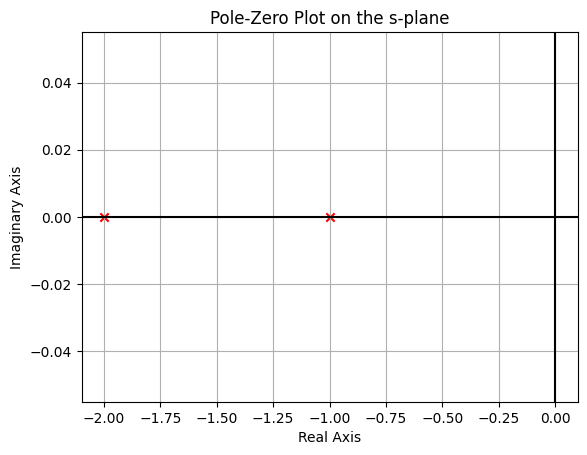

In [ ]:
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s)
numerator = [1]  # Coefficients of the numerator
denominator = [1, 3, 2]  # Coefficients of the denominator (s^2 + 3s + 2)
G_s = ctl.TransferFunction(numerator, denominator)

# Get poles from the transfer function
poles = ctl.pole(G_s)

# Plotting
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='r')  # Plot poles as red 'x'
plt.axhline(y=0, color='k', linestyle='-')  # x-axis
plt.axvline(x=0, color='k', linestyle='-')  # y-axis
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.title('Pole-Zero Plot on the s-plane')
plt.grid(True)
plt.show()


### Esempio: feedback tachimetrico


Consideriamo un sistema di controllo con un impianto specifico. Questa pianta è caratterizzata dalla sua funzione di trasferimento:

$$
\frac{25}{(s+1)(s+2)}
$$

<table>
<tr>
    <img src="../pics/22_Compensator_Design_Using_Root_Locus_math_complex_Fs.png" alt="22_Compensator_Design_Using_Root_Locus_math_complex_Fs
" style="width:650px;"/>
</tr></table>


In questo sistema abbiamo anche un ciclo di feedback. Questo ciclo è caratterizzato da un parametro $ \alpha s $, e questo tipo di feedback è noto come feedback tachimetrico. Il feedback tachimetrico è comunemente utilizzato nei sistemi di controllo della posizione per migliorare le prestazioni e la stabilità.

Oltre al feedback tachimetrico, il sistema include un circuito di feedback principale, noto come feedback unitario. La configurazione completa di questo sistema può essere visualizzata attraverso lo schema fornito (fare riferimento all'immagine collegata nel testo originale per una rappresentazione visiva).

Quando analizziamo questo sistema, prestiamo particolare attenzione al circuito di feedback minore che include il feedback tachimetrico. Semplificando questa parte del sistema possiamo rappresentarne la dinamica con la seguente espressione:

$$
\frac{25}{s^2 + 3s + 2 + 25\alpha s}
$$

Questa espressione è il risultato della combinazione della funzione di trasferimento dell'impianto con il parametro di feedback tachimetrico $ \alpha $.

Per comprendere la stabilità e il comportamento del sistema a circuito chiuso, esaminiamo la sua equazione caratteristica:

$$
s^2 + 3s + 2 + 25\alpha s + 25 = 0
$$

In questa equazione, la variabile $ \alpha $, che rappresenta la costante tachimetrica, è fondamentale. La modifica di $ \alpha $ influenzerà la stabilità del sistema e il modo in cui risponde agli input.

Per l'analisi del luogo delle radici, che è un metodo utilizzato per studiare la stabilità del sistema, dobbiamo riscrivere questa equazione caratteristica in una forma standard. Questa forma standard è $ 1 + F(s) = 0 $. Qui, $ F(s) $ rappresenta un rapporto di polinomi derivati ​​dalla dinamica del sistema, inclusa la funzione di trasferimento e il parametro di feedback $ \alpha $. Per il nostro sistema, la riformulazione è simile alla seguente:

$$
1 + \frac{25\alpha s}{s^2 + 3s + 27} = 0
$$

È importante capire che $ F(s) $ è generalmente rappresentato come:

$$
F(s) = K \frac{\prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} (s + p_j)}
$$

Nel nostro caso specifico, possiamo esprimere $ F(s) $ come:

$$
F(s) = 1+\frac{K(s+z_1)}{(s+p_1)(s+p_2)}
$$

Qui, $ z_1 = 0 $ (che indica uno zero nell'origine), e i poli $ p_1 $ e $ p_2 $ sono le radici del denominatore $ s^2 + 3s + 27 $. È fondamentale notare che i poli e gli zeri di $ F(s) $ possono differire da quelli del sistema ad anello aperto.

In questa equazione riformulata, il guadagno del luogo delle radici, indicato come $ K $, è equivalente a $ 25\alpha $. Questa formulazione si allinea con la forma standard del luogo delle radici ed è essenziale per applicare il metodo del luogo delle radici nella nostra analisi.

### Commenti sul guadagno del luogo delle radici

Quando si studia un sistema di controllo utilizzando il metodo del luogo delle radici, un aspetto chiave da considerare è il parametro che si desidera analizzare. La cosa importante da ricordare è che l'equazione caratteristica del tuo sistema deve essere riformulata. In questa equazione riformulata, il parametro di interesse dovrebbe essere introdotto come moltiplicatore. Questo parametro specifico, che introduciamo come moltiplicatore, è noto come "guadagno del luogo delle radici".

Mentre andiamo avanti con esempi e applicazioni di progettazione, tenete presente un'importante distinzione riguardante i poli e gli zeri. Quando parliamo di poli e zeri nel contesto del metodo del luogo delle radici, è essenziale capire che potrebbero non sempre corrispondere ai poli e agli zeri della funzione di trasferimento ad anello aperto del sistema. Sebbene in molte situazioni pratiche siano allineati, ci sono casi in cui differiscono.

Queste differenze sorgono perché a volte è necessario manipolare i poli e gli zeri per riformattare l'equazione caratteristica originale in un formato specifico adatto all'analisi del luogo delle radici. Questa manipolazione viene eseguita per inserire il parametro di interesse (il guadagno del luogo delle radici) nell'equazione in modo da consentirci di applicare il metodo del luogo delle radici in modo efficace.

Ad esempio, quando abbiamo esplorato esempi di progettazione che coinvolgevano la costante tachimetrica, abbiamo visto come si applicava questo principio. La costante tachimetrica faceva parte del guadagno del luogo delle radici e abbiamo osservato come influenzava il comportamento del sistema attraverso il grafico del luogo delle radici.

La conclusione fondamentale è che, sebbene i poli e gli zeri nel metodo del luogo delle radici siano cruciali per l'analisi, dovrebbero essere intesi nel contesto di come viene riformulata l'equazione caratteristica per questo specifico metodo di analisi.

## Linee guida per disegnare il luogo delle radici


### Introduzione
La nostra equazione primaria è:

$$
1 + F(s) = 0
$$

o in forma estesa:

$$
1+ K \frac{\prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} (s + p_j)} = 0
$$

Dove:

- $K$ è il guadagno del luogo delle radici (non necessariamente il guadagno del sistema).
- L'attenzione è focalizzata su $K \ge 0$ a causa della sua frequente presenza nei sistemi di controllo.
- La realizzabilità richiede che $m \le n$. Ciò garantisce che il sistema descritto da $F(s)$ sia fisicamente realizzabile.

1. **Criterio di magnitudo**:

   - La condizione di magnitudo è data da:

   $$
    K \frac{\prod_{i=1}^{m} \left|s + z_i\right|}{\prod_{j=1}^{n} \left|s + p_j\right|} = 1
   $$

2. **Criterio dell'angolo**:

   - La condizione dell'angolo è:

   $$
   \sum_{i=1}^{m} \angle(s + z_i) - \sum_{j=1}^{n} \angle(s + p_j) = \pm (2q + 1)180^\circ, \quad q = 0, 1, 2, \ldots
   $$
   
   
### Scansione dell'aereo-s

1. **Identificazione dei punti che soddisfano la condizione dell'angolo**:
   
   Scansiona l'intero piano s per individuare i punti che soddisfano la condizione dell'angolo.

2. **Costruzione del luogo delle radici**:
   
   Collega questi punti per formare i rami del luogo delle radici. I punti che soddisfano la condizione angolare, una volta uniti tra loro, formano i rami del luogo delle radici.

3. **Utilizza il calcolo della magnitudine:**

    Per ogni punto su questi rami esiste un valore di $K$ tale che siano soddisfatte sia la condizione della grandezza che quella dell'angolo.

**Domanda pop-up**: Perché è importante considerare sia le condizioni di magnitudo che quelle di angolo nell'analisi del luogo delle radici?

**Risposta**: entrambe le condizioni devono essere soddisfatte per garantire che i punti sul luogo delle radici rappresentino risposte valide del sistema al variare di $ K $. La condizione di ampiezza garantisce la corretta amplificazione, mentre la condizione di angolo garantisce la stabilità di fase.

## Linee guida per disegnare il luogo delle radici

In questa sezione esploreremo il metodo del luogo delle radici. Sebbene i tuoi libri di testo offrano dimostrazioni dettagliate, la nostra attenzione qui sarà più focalizzata sull'applicazione pratica.

Ecco come procederemo:

1. **Comprensione delle regole**: questa parte presenta le regole per costruire un diagramma del luogo delle radici. Non approfondiremo le dimostrazioni matematiche, ma applicheremo piuttosto queste regole attraverso esempi, concentrandoci in particolare sulla soddisfazione della condizione angolare.

2. **Scansione del piano s**: il metodo prevede la scansione dell'intero piano s per trovare punti che soddisfino la condizione dell'angolo. Immagina il piano s pieno di punti, ciascuno dei quali rappresenta una parte potenziale del luogo delle radici.

3. **Il metodo della forza bruta**: questo metodo è semplice ma richiede molto lavoro. Per ogni punto sul piano s (chiamiamolo $ s_0 $), misuriamo gli angoli formati disegnando vettori da tutti i poli e zeri ad anello aperto della funzione $ F(s) $ a $ s_0 $. Sommando questi angoli, determiniamo se il totale è un multiplo dispari di -180 gradi, il che indica che $ s_0 $ è un punto sul luogo delle radici.


<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_1.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_1" style="width:350px;"/>
        </td>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_2.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_2" style="width:350px;"/>
        </td>
    </tr>
</table>



4. **Grafica assistita da computer**: sebbene il metodo della forza bruta sia efficace, richiede anche molto tempo. Fortunatamente, gli strumenti di progettazione assistita da computer possono automatizzare questo processo, generando rapidamente un grafico del luogo delle radici. Questi strumenti possono gestire calcoli complessi e rappresentazioni grafiche, rendendo il processo di progettazione molto più efficiente.

5. **Utilizzo delle linee guida**: esistono alcune linee guida che possono aiutarci a identificare rapidamente potenziali punti sul piano s per il criterio dell'angolo. Queste linee guida non ti forniranno immediatamente il grafico completo del luogo delle radici, ma ti guideranno vicino ai punti reali. Questo approccio, combinato con schizzi approssimativi, può essere molto istruttivo per le considerazioni iniziali sulla progettazione.

6. **Il ruolo dei computer nella progettazione**: i software moderni hanno notevolmente semplificato questi processi. Inserendo diversi valori dei parametri di sistema come $ \alpha $ o $ K $, il software può fornire immediatamente un grafico del luogo delle radici. Questa visualizzazione aiuta in modo significativo a prendere decisioni di progettazione informate.

Sebbene comprendere la teoria alla base dei grafici del luogo delle radici sia importante, gli strumenti informatici di oggi aiutano notevolmente negli aspetti pratici della progettazione. Il nostro obiettivo è fondere le conoscenze teoriche con le competenze pratiche per progettare in modo efficiente sistemi di controllo.

Se dovessi riscontrare difficoltà con i calcoli, ricorda che possono essere estesi e non è previsto che vengano eseguiti manualmente, soprattutto in un contesto di esame. Abbiamo accesso a computer in grado di eseguire questi calcoli complessi per noi. Il nostro obiettivo qui è quello di cogliere gli aspetti qualitativi dei metodi di progettazione nell'ingegneria del controllo.

_Ecco il punto chiave: questo quaderno fornisce le linee guida di base per creare uno schizzo approssimativo del luogo delle radici. Questo schizzo, anche se approssimativo, è molto utile. Ti aiuta a prendere decisioni fondamentali sulla progettazione del sistema di controllo senza addentrarti in calcoli complessi. Ad esempio, sulla base di questo schizzo approssimativo, puoi decidere se utilizzare un controller proporzionale-integrale (PI), un controller proporzionale-derivativo (PD) o un controller proporzionale-integrale-derivativo (PID), tra le altre opzioni. Questo processo decisionale iniziale, guidato da una conoscenza di base del diagramma del luogo delle radici, può essere effettuato anche prima di utilizzare un computer per un'analisi dettagliata._

## Come disegnare il luogo delle radici: regole di disegno

### Regola 1: regola di simmetria

Il diagramma del luogo delle radici deve essere simmetrico rispetto all'asse reale. Questa simmetria è dovuta al fatto che in qualsiasi sistema reale le radici complesse si presentano in coppie coniugate, risultando in coefficienti reali per l'equazione caratteristica.

Se costruisci accuratamente metà del luogo delle radici (sopra l'asse reale), l'altra metà (sotto l'asse reale) è la sua immagine speculare. Questa simmetria semplifica il processo di stampa.


### Regola 2: rami del luogo delle radici

I rami del luogo delle radici iniziano ai poli ad anello aperto della funzione $ F(s) $ (dove $ K = 0 $) e terminano agli zeri ad anello aperto di $ F(s) $ o all'infinito (dove $K = \infty$).

Il numero di rami del luogo delle radici è pari a $n$, il numero di poli ad anello aperto di $ F(s) $. I punti terminali di questi rami sono gli zeri di $ F(s) $ oppure i punti all'infinito.

Ciò significa che i rami $m$ terminano negli zeri di $F(s)$ e $(n-m)$ terminano all'infinito.


### Regola 3: Segmenti dell'asse reale

Per determinare se un segmento sull'asse reale fa parte del luogo delle radici, conta il numero di poli e zeri a destra di qualsiasi punto su quel segmento. Se il conteggio è dispari, il segmento fa parte del luogo delle radici.

Questa regola aiuta a identificare rapidamente i segmenti dell'asse reale che appartengono al luogo delle radici. Ad esempio, se c'è un polo a destra di un punto e non ci sono zeri, il segmento a sinistra di questo punto fa parte del luogo delle radici.


<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_3.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_3" style="width:550px;"/>
        </td>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_4.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_4" style="width:550px;"/>
        </td>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_5.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_5" style="width:550px;"/>
        </td>
    </tr>
</table>

1. **Punti iniziali**: In questo esempio, iniziamo con tre punti in cui $ K = 0 $. Questi punti sono i punti di partenza dei nostri rami del luogo delle radici. Ricorda, il luogo delle radici inizia dai poli ad anello aperto del sistema, che sono rappresentati da questi punti.

2. **Punti terminali**: Per ogni ramo, c'è un punto terminale dove $ K $ si avvicina all'infinito. Nel nostro schizzo ci sono tre punti terminali di questo tipo corrispondenti a ciascun ramo.

3. **Capire i rami**: Uno dei rami in questo grafico si estende da un punto iniziale (dove $ K = 0 $) a un punto terminale (dove $ K = \infty $). Questo mostra un ramo completo del luogo delle radici. Tuttavia, è importante notare che questo segmento del grafico rappresenta solo un ramo dell'intero luogo delle radici.

4. **Segmento sul luogo delle radici**: sebbene il segmento più a sinistra di questo luogo delle radici faccia parte del grafico del luogo delle radici, non costituisce necessariamente un singolo ramo indipendente. Il grafico del luogo delle radici è una combinazione di tutti questi segmenti e ciascun segmento è definito da dove inizia e finisce in termini di guadagno $ K $.

5. **Completezza del ramo**: Il completamento di questo ramo da $ K = 0 $ a $ K = \infty $ suggerisce che si tratta di una rappresentazione completa di come uno dei poli del sistema si muove nel piano complesso come $ K $ varia. Tuttavia, per validare pienamente questo ramo, applicheremmo regole aggiuntive del metodo del luogo delle radici, di cui parleremo più avanti.

Vedremo come completare il diagramma mentre esaminiamo il resto delle regole.

### Regola 4: Direzioni degli asintoti

#### Comprendere le direzioni degli asintoti
Per un sistema con $ n $ poli e $ m $ zeri, i rami $ n - m $ del luogo delle radici vanno all'infinito. Le direzioni in cui questi rami si avvicinano all'infinito sono determinate da una formula specifica.

#### La formula
La formula per la direzione degli asintoti è data da:

$$
\Phi_A = (2q + 1) \times \frac{180^\circ}{n - m}
$$

dove $ q = 0, 1, 2, ..., n - m - 1 $.


Questa formula fornisce gli angoli ai quali i rami del luogo delle radici si avvicinano all'infinito. Aiuta a delineare il comportamento asintotico del grafico del luogo delle radici.

### Regola 5: Centroide degli asintoti

Il baricentro degli asintoti è un punto cruciale sull'asse reale da cui vengono misurate le direzioni degli asintoti. Si calcola come:

$$
\sigma_A = \frac{\sum \text{parti reali dei poli} - \sum \text{parti reali degli zeri}}{n - m}
$$

Questo è il punto sull'asse reale dove tutti gli asintoti si uniscono.

## Applicare le regole: un esempio

Applichiamo queste regole alla funzione di trasferimento

$$ F(s) = \frac{K}{s(s+1)(s+2)} $$

Qui, $ n = 3 $ e $ m = 0 $.


Nessuno zero finito, quindi tutti i rami andranno all'infinito.

### Angoli asintotici e baricentro

1. **Calcolo degli angoli asintotici**:
   
   Applicando la formula per $ n - m = 3$ direzioni:
   
   
    $$
    \Phi_A = (2q + 1) \times \frac{180^\circ}{n - m}
    $$

    dove $q = 0, 1, 2$.
   
    Troviamo gli angoli in $\Phi_A=$ 60°, 180° e 240°.

2. **Determinazione del centroide**:

   Il baricentro $ \sigma_A $ viene calcolato come:
   
   $$
    \sigma_A = \frac{\sum \text{parti reali dei poli} - \sum \text{parti reali degli zeri}}{n - m} = \frac{0-1-2}{3} = -1
    $$

Utilizzando le informazioni che abbiamo per ora, possiamo iniziare a delineare il luogo delle radici:


<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_6.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_6" style="width:650px;"/>
        </td>
    </tr>
</table>

### Regola 6: punto di fuga

#### Concetto di punti di fuga
I punti di distacco sul luogo delle radici sono posizioni critiche in cui più rami delle radici convergono o divergono sull'asse reale.

#### Definizione del punto di distacco

In un punto di rottura sull'asse reale, il valore del guadagno di controllo $K$ è al suo massimo rispetto a quel segmento (vedi ad esempio il grafico sopra). Quando $K$ aumenta oltre questo punto, le radici diventano coniugate complesse.


#### Calcolo dei punti di fuga
Usando questa comprensione intuitiva di un punto di rottura che massimizza il valore di $K$, per trovare un punto di rottura, usiamo la condizione:

$$
\frac{dK}{ds} = 0
$$

Questa condizione rappresenta l'estremizzazione di $ K $ rispetto a $ s $.

Questo processo comporta la differenziazione di $ K $ in funzione di $ s $, ottenuta dall'equazione caratteristica del sistema. Risolviamo quindi per $ s $ dove questa derivata è uguale a zero.

Usiamo l'espressione di $K$ dall'equazione:

$$
1+ K \frac{\prod_{i=1}^{m} (s + z_i) }{ \prod_{j=1}^{n} (s + p_j)} = 0
$$

#### Applicazione del concetto


Consideriamo ancora il nostro esempio:

$$ 1+F(s) = 1+\frac{K}{s(s+1)(s+2)} = 0$$

Ricaveremo $ K $ in funzione di $ s $ e troveremo la sua derivata:


$$
K = -\Big(s^3+3s^2+2s\Big)
$$

E

$$
\frac{dK}{ds} = -\Big( 3s^2 + 6s + 2 \Big)=0
$$


Risolvere l'equazione quadratica da $\frac{dK}{ds} = 0$ fornisce potenziali punti di rottura.

$$
s_1 = -0,423,\;\;\; s_2 = -1.577
$$


Non tutte le soluzioni però sono valide; devono soddisfare il criterio dell'angolo per essere considerati veri e propri punti di distacco.

Questo è mostrato nel diagramma seguente:

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_7.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_7" style="width:650px;"/>
        </td>
    </tr>
</table>

### Condizioni più complesse

Considera la funzione

$$ 1+ F(s) = 1 + \frac{K}{s(s+4)(s^2 + 4s + 20)} $$

Il luogo delle radici inizia dai poli $ s = 0, -4 $ e i poli complessi coniugati sono $s = -2\pm j4$.

#### Trovare punti di fuga

1. **Identificazione dei candidati**: Risolvi $ \frac{dK}{ds} = 0 $ per i $ F(s) $ dati per identificare potenziali punti di rottura.
2. **Convalida dei candidati**: controllare ciascun candidato rispetto al criterio dell'angolo per confermare se si tratta di un punto di fuga valido.


<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_8.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_8" style="width:650px;"/>
        </td>
    </tr>
</table>



Questo esempio mostra che i punti di distacco non si trovano sempre sull'asse reale. Si verificano punti di rottura complessi, specialmente nei sistemi con poli o zeri complessi.

Spesso i punti di rottura mostrano simmetria, specialmente nei sistemi con configurazioni polo-zero simmetriche.

Un altro esempio più semplice con punti di distacco è:

$$
1 + F(s) = 1 + \frac{Ks}{s^2 + 2s + 2}
$$

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_9.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_9" style="width:650px;"/>
        </td>
    </tr>
</table>

Ancora una volta, il punto di rottura soddisfa $\frac{dK}{ds} = 0$ e la condizione dell'angolo.

Nota: i punti di rottura sono chiamati punti di rottura quando le radici si uniscono.

### Radici Angoli di distacco


Quando si analizzano i grafici del luogo delle radici, un concetto importante è l'angolo al quale le radici si staccano dall'asse reale. Questo angolo, indicato come $ \phi $, è determinato dalla formula:

$$
\phi = \frac{180^\circ}{r}
$$

Qui, $ r $ rappresenta il numero di rami che si incontrano nel punto di separazione. Ad esempio, se due rami si incontrano, l'angolo di distacco è $ 90^\circ $.

### Esempio di analisi:

Consideriamo la funzione di trasferimento data da:

$$
1 + F(s) = 1 + \frac{K}{s (s + 4) (s^2 + 4s + 8)}
$$

Per trovare i punti di rottura, risolviamo l'equazione derivata ponendo a zero la derivata di $ K $ rispetto a $ s $, ovvero $ \frac{dK}{ds} = 0 $. Tra le soluzioni, solo quelle che soddisfano la condizione angolare sono considerate validi punti di distacco.

Nel nostro caso troviamo:

$$
\phi = \frac{180^\circ}{4} = 45^\circ
$$

Ciò implica che, per questa particolare funzione di trasferimento, le radici si staccano con un angolo di $ 45^\circ $.

### Grafico del luogo delle radici

Lo script seguente può essere utilizzato per visualizzare il grafico del luogo delle radici per questa funzione di trasferimento, illustrando i punti di rottura e i loro angoli corrispondenti.

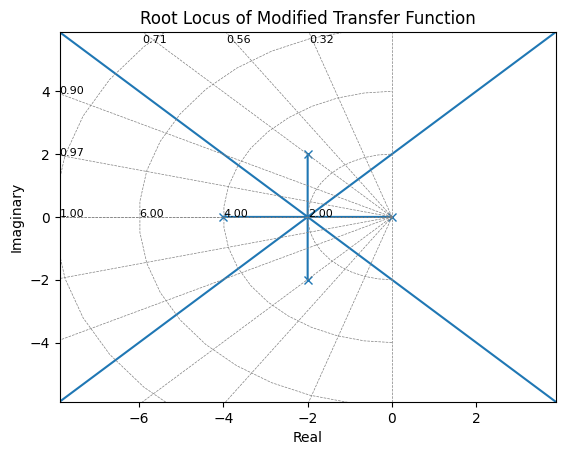

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

s = ctl.tf('s')

G_modified = 1 / (s * (s + 4) * (s**2 + 4*s + 8))

# Plot root locus for the modified transfer function
plt.figure()
ctl.root_locus(G_modified, plot=True)
plt.title("Root Locus of Modified Transfer Function")

plt.show()


# Go deeper and see what happens when you 
# modify the transfer function to change the root locus once more.

# Original transfer function
# s = ctl.tf('s')
# G_original = 1 / (s * (s + 4) * (s**2 + 4*s + 20))

# # Plot root locus for the original transfer function
# plt.figure()
# ctl.root_locus(G_original, Plot=True)
# plt.title("Root Locus of Original Transfer Function")

# Let's change the quadratic term to s^2 + 6s + 25
# G_modified = 1 / (s * (s + 4) * (s**2 + 6*s + 25))


-----

## Domande

**Domanda pop-up**: Perché il grafico del luogo delle radici è simmetrico rispetto all'asse reale?
   
**Risposta**: La simmetria è dovuta alla complessa natura coniugata delle radici nei sistemi reali. Per ogni polo o zero complesso esiste una controparte coniugata, risultando in grafici simmetrici.

**Domanda pop-up**: In che modo il numero di poli e zeri influisce sul numero di rami nel grafico del luogo delle radici?

**Risposta**: Il numero di rami nel diagramma del luogo delle radici è uguale al numero di poli ad anello aperto del sistema. I rami partono da questi poli e si muovono verso gli zeri o verso l'infinito.

**Domanda pop-up**: Perché abbiamo bisogno di conoscere le direzioni degli asintoti nell'analisi del luogo delle radici?

**Risposta**: conoscere le direzioni degli asintoti aiuta a prevedere come si comportano i rami del luogo delle radici mentre si muovono verso l'infinito, il che è fondamentale per comprendere la stabilità e la progettazione del sistema.

**Domanda pop-up**: In che modo la posizione del baricentro influisce sul grafico del luogo delle radici?

**Risposta**: Il baricentro è il punto di partenza degli asintoti sull'asse reale. La sua posizione influenza il modo in cui i rami del luogo delle radici divergono verso l'infinito, influenzando la forma complessiva dell'appezzamento.


**Domanda pop-up**: In che modo i punti di distacco influiscono sulla stabilità di un sistema di controllo?

**Risposta**: I punti di breakaway indicano il punto in cui le radici del sistema (poli della funzione di trasferimento ad anello chiuso) passano da reale a complesso o viceversa, influenzando la stabilità del sistema e il comportamento oscillatorio.

**Domanda pop-up**: I punti di distacco possono verificarsi fuori dall'asse reale?

**Risposta**: Sì, soprattutto nei sistemi con poli o zeri complessi, possono verificarsi punti di rottura fuori dall'asse reale, indicando una transizione nella traiettoria della radice.
   
**Domanda pop-up**: Perché il valore massimo di $ K $ è significativo nei punti di fuga?

**Risposta**: il valore massimo di $ K $ in un punto di rottura indica la transizione dalle radici coniugate reali a quelle complesse (o viceversa), segnando un cambiamento critico nella dinamica del sistema.

**Domanda pop-up**: Come determiniamo quali soluzioni per i punti di fuga sono valide?

**Risposta**: Dopo aver calcolato i potenziali punti di distacco, dobbiamo confrontarli ciascuno con il criterio dell'angolo. Solo quelli che soddisfano questo criterio sono punti di fuga validi.

### Riepilogo

Ecco un riepilogo delle regole del luogo delle radici trattate finora:

1. **Regola di simmetria**: il grafico del luogo delle radici è sempre simmetrico rispetto all'asse reale. Questa simmetria nasce perché i poli o gli zeri complessi nelle equazioni polinomiali con coefficienti reali si verificano in coppie coniugate.

2. **Rami del luogo delle radici - Punti iniziale e finale**:
   - I rami del luogo delle radici iniziano ai poli ad anello aperto (dove il guadagno $ K = 0 $).
   - Terminano con gli zeri ad anello aperto o vanno all'infinito se ci sono meno zeri che poli.


3. **Segmenti dell'asse reale**: Un segmento sull'asse reale è una parte del luogo delle radici se il numero totale di poli e zeri a destra di qualsiasi punto su quel segmento è dispari.


4. **Direzioni degli asintoti**: quando il numero di poli è maggiore del numero di zeri, i rami del luogo delle radici vanno all'infinito lungo gli asintoti. Le direzioni di questi asintoti sono date da $ \theta = (2q + 1) \times \frac{180^\circ}{n - m} $, dove $ q $ varia da 0 a $ n - m - 1 $.

5. **Centroide degli asintoti**: Il punto sull'asse reale da cui provengono gli asintoti (il baricentro) viene calcolato utilizzando la formula: $ \sigma_A = \frac{\sum \text{parti reali dei poli} - \sum \text{parti reali degli zeri}}{n - m} $.

6. **Punti di rottura e di rottura**: questi punti sul luogo delle radici sono i punti in cui i rami divergono o convergono verso l'asse reale. Possono essere trovati risolvendo $ \frac{dK}{ds} = 0 $ per $ s $ e selezionando i punti che soddisfano il criterio dell'angolo.
   - **Angoli di rottura**: L'angolo al quale i rami si staccano o convergono verso l'asse reale è $ \phi = \frac{180}{r} $, dove $ r $ è il numero di rami che si incontrano nel punto .

### Regola 7: L'angolo di partenza e di arrivo


L'angolo di partenza da un polo complesso e l'angolo di arrivo ad uno zero complesso sono importanti per capire come si comportano i rami del luogo delle radici in prossimità di questi punti.


#### Angolo di partenza da un polo complesso

**Regola per l'angolo di partenza**: l'angolo al quale un luogo delle radici si allontana da un polo complesso è determinato dalla somma dei contributi angolari di tutti gli altri poli e degli zeri a questo polo, meno 180 gradi moltiplicati per (2q + 1) , dove q è un numero intero.

**Spiegazione di esempio**: Considera un sistema con due poli e uno zero. Lo schizzo del luogo delle radici mostra la traiettoria dei poli del sistema al variare del guadagno $K$. Quando $K$ aumenta da 0, i poli si muovono lungo il percorso del luogo delle radici, staccandosi infine dall'asse reale. La direzione in cui si staccano (l'angolo di partenza) è essenziale per comprendere il comportamento del sistema.


<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_10.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_10" style="width:650px;"/>
        </td>
    </tr>
</table>

**Passaggi per l'angolo di partenza**:
1. Identificare il complesso polo di interesse.
2. Calcolare il contributo angolare, $\theta_1$, dovuto allo zero e $\theta_2$ dovuto all'altro polo.
3. Il contributo dell'angolo netto a questo polo è $\theta_1 - \theta_2$ (il contributo zero è positivo e quello dei poli è negativo).
4. L'angolo di partenza $\phi_p$ è dato dalla formula: $\phi_p = \pm 180^\circ \times (2q + 1) + \phi$, dove $\phi_p$ è il contributo dell'angolo netto.


Ad esempio, nel caso seguente, guarda l'angolo di partenza dovuto al contributo di tutti gli zeri e i poli:

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_11.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_11" style="width:650px;"/>
        </td>
    </tr>
</table>

#### Angolo di arrivo allo zero complesso

**Regola per l'angolo di arrivo**: l'angolo al quale un luogo delle radici arriva a uno zero complesso viene determinato in modo simile, considerando la somma dei contributi angolari di tutti gli altri poli e zeri a questo zero.

**Passaggi per l'angolo di arrivo**:
1. Identificare lo zero complesso di interesse.
2. Calcola il contributo angolare totale, $\phi_z$, da tutti i poli e gli zeri a questo zero.
3. L'angolo di arrivo è dato da $\phi_z = \pm 180^\circ \times (2q + 1) - \phi$.

Per esempio:

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_12.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_12" style="width:650px;"/>
        </td>
    </tr>
</table>

E l'angolo di avvicinamento allo zero è $\phi_z = 180^\circ - (\theta_2 - 2\theta_1)$

### Regola 8: criterio di Routh-Hurwitz e intersezione dell'asse immaginario

Consideriamo ancora una volta:

$$ 1+F(s) = 1+\frac{K}{s(s+1)(s+2)} = 0$$

Abbiamo determinato il seguente grafico del luogo delle radici:

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_7.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_7" style="width:650px;"/>
        </td>
    </tr>
</table>


L'ultima regola di cui parleremo prevede l'utilizzo del criterio di Routh-Hurwitz per determinare il punto in cui il luogo delle radici interseca l'asse immaginario.

**Passaggi per utilizzare il criterio di Routh-Hurwitz**:
1. Formare l'equazione caratteristica del sistema.
2. Costruisci l'array Routh.
3. Identificare la condizione per cui una riga dell'array Routh diventa zero.
4. Utilizzare questa condizione per trovare il valore di $K$ in corrispondenza del quale il luogo delle radici interseca l'asse immaginario.

**Esempio**:

Consideriamo un sistema con l'equazione caratteristica $$ G(s) = \frac{K}{s(s+1)(s+2)} $$

L'equazione caratteristica è:

$$s^3 +3s^2 +2s+K=0$$


Per costruire l'array Routh per l'equazione $ s^3 + 3s^2 + 2s + K = 0 $, dobbiamo organizzare i coefficienti del polinomio in formato tabellare. L'array Routh ci aiuta a determinare il numero di radici con parti reali positive, il che rende possibile comprendere la stabilità del sistema.

Ecco come costruire l'array Routh per il polinomio dato:

1. **Disponi i coefficienti**: inizia scrivendo i coefficienti del polinomio in potenze decrescenti di $ s $.

2. **Prime due righe**: posiziona i coefficienti delle potenze pari di $ s $ nella prima riga e quelli delle potenze dispari di $ s $ nella seconda riga.

3. **Righe successive**: calcola ogni elemento delle righe inferiori utilizzando la formula:
   $$
   R_{i,j} = -\frac{1}{R_{i-1,1}} \left( R_{i-1,1}R_{i-2,j+1} - R_{i-2 ,1}R_{i-1,j+1} \right)
   $$
   dove $ R_{i,j} $ è l'elemento nella $ i $-esima riga e $ j $-esima colonna.

4. **Completamento dell'array**: continua questo processo finché non avrai riempito l'array. Se una riga qualsiasi inizia con zero, per procedere vengono utilizzate tecniche speciali come la divisione polinomiale o l'utilizzo di un piccolo numero positivo (ε).

Per il polinomio dato $ s^3 + 3s^2 + 2s + K = 0 $, l'array Routh sarà:

||||
|:--------------:|---|:---:|
| $ s^3 $ | $1$ | $2$ |
| $ s^2 $ | $3$ | $K$ |
| $ s^1 $ | $\frac{6-K}{3} $ | $0$ |
| $ s^0 $ | $K$ | |

- La prima colonna dell'array Routh indica il numero di radici con parti reali positive. Se c'è un cambiamento di segno in questa colonna, indica una radice con una parte reale positiva, il che implica instabilità nel sistema.
- La stabilità del sistema dipende dal valore di $ K $. Affinché il sistema sia stabile, tutti gli elementi nella prima colonna devono essere positivi. Pertanto, le condizioni per la stabilità possono essere derivate garantendo valori positivi in ​​questa colonna.

### Determinazione delle condizioni di stabilità

Dalla terza riga abbiamo $ \frac{6-K}{3} $. Per la stabilità, questo termine deve essere positivo, portando alla condizione:

$$ K < 6 $$

And from the last row, since it's just $ K $, for stability, we must also have:

$$ K > 0 $$

Pertanto il sistema è stabile per:

$$ 0 < K < 6 $$

Quando il fattore di guadagno $ K $ è impostato su 6, incontriamo una situazione speciale nell'array Routh. Nello specifico, la riga corrispondente a $ s^1 $ diventa tutta zeri. Questo evento è significativo perché indica una certa condizione nell'analisi dei sistemi di controllo.

### Comprensione del polinomio ausiliario

Qui entra in gioco il concetto di polinomio ausiliario. Deriva dalla riga appena sopra la riga tutta zero nell'array Routh. Nel nostro caso, poiché la riga $ s^1 $ è tutta zeri, esaminiamo la riga $ s^2 $.

Dalla riga $ s^2 $, il polinomio ausiliario è formato come segue:

$$ 3s^2 + K$$

Ponendo $ K = 6 $, come nel nostro caso particolare, il polinomio diventa:

$$ 3s^2 + 6 = 0 $$

### Trovare le radici

Le radici di questo polinomio ausiliario sono anche le radici dell'equazione caratteristica originale in $ K = 6 $. Risolviamo questa equazione:

Iniziare con:

$$ 3s^2 + 6 = 0 $$

Lo semplifichiamo in:

$$ s^2 + 2 = 0 $$

Per trovare le radici $ s_{1,2} $, risolviamo per $ s $:

$$ s_{1,2} = \pm j\sqrt{2} $$

Queste sono radici complesse, dove $ j $ rappresenta l'unità immaginaria.

### Visualizzazione sul diagramma del luogo delle radici

Con queste radici, ora possiamo aggiornare il nostro diagramma del luogo delle radici. Questi punti, $ \pm j\sqrt{2} $, rappresentano le intersezioni del luogo delle radici con l'asse immaginario. L'aggiunta di queste intersezioni ci consente di completare lo schizzo approssimativo del diagramma del luogo delle radici.

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_sketch_14.png" alt="22_Compensator_Design_Using_Root_Locus_sketch_14" style="width:650px;"/>
        </td>
    </tr>
</table>

_Diagramma che mostra il grafico del luogo delle radici con le intersezioni in $ \pm j\sqrt{2} $_.



Questo passaggio è importante nella progettazione del sistema di controllo poiché ci aiuta a visualizzare come si muovono i poli del sistema nel piano complesso, in particolare quando cambia il guadagno $ K $. I punti di intersezione con l'asse immaginario forniscono preziose informazioni sulla stabilità del sistema a valori di guadagno specifici.

## Esempio 1

In questa parte ci concentreremo su un esempio completo per comprendere l'applicazione del metodo del luogo delle radici.

Consideriamo un sistema a retroazione unitaria con una funzione di trasferimento ad anello aperto data da:

$$ G(s) = K \cdot \frac{1}{s(s+3)(s^2+2s+2)} $$

Il nostro obiettivo è applicare le regole del luogo delle radici a questa funzione di trasferimento e analizzare il grafico del luogo delle radici risultante.

### Passaggio 1: identificazione dei poli e degli zeri ad anello aperto

Per prima cosa dobbiamo identificare i poli e gli zeri del sistema ad anello aperto. Per la nostra data funzione di trasferimento, i poli sono a:

-$s = 0$
-$s = -3$
- Le radici di $ s^2 + 2s + 2 $, che sono complesse: $ s = -1 \pm j $

### Passaggio 2: tracciare il diagramma Polo-Zero

Successivamente, tracciamo questi poli e zeri sul piano complesso $ s $. Questo ci aiuta a visualizzare i punti di partenza del nostro luogo delle radici.


<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_1.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_1" style="width:650px;"/>
        </td>
    </tr>
</table>

Possiamo ottenere il diagramma sopra in Python:

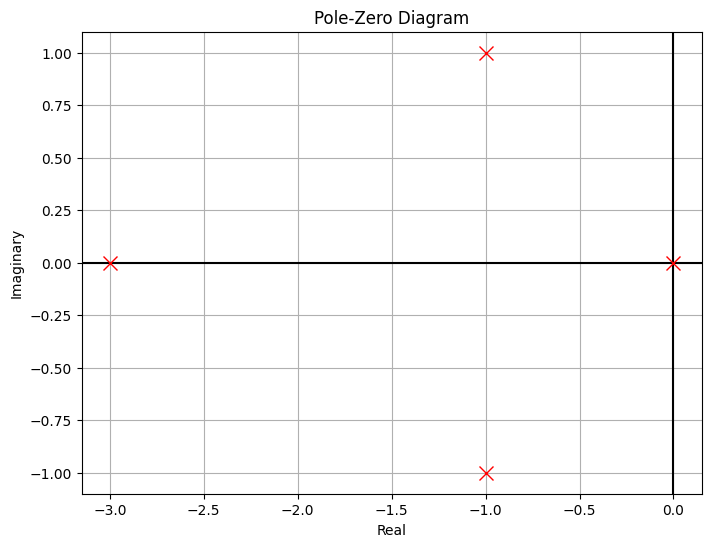

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

def plot_pole_zero_diagram(poles, zeros):
    """
    Plots the pole-zero diagram.
    
    Parameters:
    poles (list): List of complex numbers representing poles.
    zeros (list): List of complex numbers representing zeros.
    """

    # Setting up the plot
    plt.figure(figsize=(8, 6))
    plt.axhline(y=0, color='k')  # Horizontal axis
    plt.axvline(x=0, color='k')  # Vertical axis
    plt.grid(True, which='both')

    # Plot poles as 'x' and zeros as 'o'
    for pole in poles:
        plt.plot(np.real(pole), np.imag(pole), 'rx', markersize=10)  # Poles
    for zero in zeros:
        plt.plot(np.real(zero), np.imag(zero), 'bo', markersize=10)  # Zeros

    plt.title('Pole-Zero Diagram')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.show()

# Define poles and zeros for the example transfer function
poles = [0, -3, complex(-1, 1), complex(-1, -1)]  # s=0, s=-3, s=-1±j
zeros = []  # No zeros in this example

# Call the function to plot the diagram
plot_pole_zero_diagram(poles, zeros)


### Passo 3: Determinazione dei rami del luogo delle radici

Poiché ci sono quattro poli e nessuno zero, ci aspettiamo quattro rami del luogo delle radici che iniziano da ciascun polo. Da questi poli si origineranno i rami in quanto il guadagno $K$ varia da 0 a infinito.

**Domanda pop-up**: Perché in questo caso ci aspettiamo quattro rami del luogo delle radici?

**Risposta**: il numero di rami del luogo delle radici è uguale al numero di poli ad anello aperto. Qui abbiamo quattro poli, quindi quattro rami.

### Passaggio 4: calcolo degli angoli di partenza ($\phi_p$)

La direzione in cui il luogo delle radici si allontana dai poli complessi è importante. Questo è determinato dall'angolo di partenza, calcolato utilizzando la formula:

$$ \phi_p = \pm 180^\circ - (\text{somma degli angoli dovuti ad altri poli e zeri}) $$

**Esempio di calcolo**: Per i nostri poli complessi a $ s = -1 \pm j $, calcoliamo gli angoli dovuti ad altri poli e applichiamo la formula per trovare $ \phi_p $.

e quindi:

$$ \phi_p = \pm 180^\circ - \theta_1 - \theta_2 - \theta_3 = -71,6^o$$

Per calcolare l'angolo di partenza $\phi_p$ del polo $-1 + j$ per la nostra funzione di trasferimento di esempio, dobbiamo seguire questi passaggi:

1. **Identificare il Polo e gli Altri Elementi**: Ci stiamo concentrando sul polo a $-1 + j$. Gli altri elementi del sistema includono i poli $0$, $-3$ e $-1 - j$. Non ci sono zeri in questo sistema.

2. **Calcola i contributi angolari**: il contributo angolare di ciascun polo/zero al polo a $-1 + j$ è calcolato dall'angolo del vettore da ciascun polo/zero al polo a $-1 + j $.

3. **Somma degli angoli**: somma questi contributi angolari, tenendo presente che gli angoli dovuti ai poli vengono sottratti (come sono nel denominatore della funzione di trasferimento).

4. **Applica la formula**: usa la formula $\phi_p = \pm 180^\circ - (\text{somma degli angoli dovuti ad altri poli e zeri})$.

Calcoliamolo passo dopo passo:

### Passaggio 1: identificazione dei poli

- Poli: $0, -3, -1 - j$
- Polo di interesse: $-1 + j$

### Passaggio 2: calcolo dei contributi angolari

Per ogni polo $s_i$ l'angolo $\theta_i$ formato con il polo di interesse $-1 + j$ si calcola come segue:

1. **Polo in $0$:**
   
   $$\theta_{0} = \angle(-1 + j - 0) = \tan^{-1}\left(\frac{\text{Parte immaginaria}}{\text{Parte reale}}\right) = \tan^{-1}\left(\frac{1}{-1}\right) = -135^\circ$$
   
2. **Polo in $-3$:**
   
   $$\theta_{-3} = \angle(-1 + j - (-3)) = \tan^{-1}\left(\frac{1}{2}\right) \approx 26,57^\circ $$

3. **Polo in $-1 - j$:**
   
   $$\theta_{-1-j} = \angle(-1 + j - (-1 - j)) = \tan^{-1}\left(\frac{2}{0}\right) = 90 ^\circ$$

### Passaggio 3: applicazione della formula

Infine, applica la formula per $\phi_p$:
$$
\phi_p = \pm 180^\circ - 135^\circ - 26.57^\circ - 90^\circ
$

Ciò produce due possibili valori per $\phi_p$:

- $\phi_{p1} = 180^\circ - 251,56^\circ = -71,57^\circ$
- $\phi_{p2} = -180^\circ - 251,56^\circ = 288,43^\circ$

Quindi, entrambi i calcoli portano allo stesso angolo di partenza, $-71,57^\circ$. Questo è l'angolo al quale il luogo delle radici si allontanerà dal polo complesso a $-1 + j$.

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_2.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_2" style="width:650px;"/>
        </td>
    </tr>
</table>

### Passaggio 5: asintoti e centroide

Gli asintoti forniscono un'idea approssimativa delle direzioni in cui tenderanno i rami del luogo delle radici. Calcoliamo gli angoli degli asintoti (φA) e il baricentro (σA) utilizzando:

$$ \phi_A = \frac{(2q+1) \times 180^\circ}{n-m} = 45, 135, 225, 315$$

$$ \sigma_A = \frac{\text{somma delle parti reali dei poli - somma delle parti reali degli zeri}}{n-m} = -1,25 $$

Dove $ n $ è il numero di poli, $ m $ il numero di zeri e $ q $ varia da 0 a $ n-m-1 = 3$.

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_3.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_3" style="width:650px;"/>
        </td>
    </tr>
</table>

**Domanda pop-up**: cosa rappresenta il baricentro nel grafico del luogo delle radici?

**Risposta**: il baricentro rappresenta la posizione media degli asintoti sull'asse reale, fornendo un punto di riferimento centrale per la direzione dei rami del luogo delle radici.

### Passaggio 6: punti di fuga

I punti di breakaway sono i punti in cui i rami del luogo delle radici si allontanano dall'asse reale. Li calcoliamo utilizzando la condizione:

$$ \frac{dK}{ds} = 0 $$

Dove $ K $ è il guadagno ad anello aperto.

1. **Trova la funzione di trasferimento ad anello aperto**:

La funzione di trasferimento ad anello aperto data è $ 1+F(s) = 1+\frac{K}{s(s+3)(s^2+2s+2)} $.


2. **Esprimi $ K $ in termini di $ s $**:

Riscrivi $ F(s) $ in modo che $ K = -s(s+3)(s^2+2s+2) = -(s^4+5s^3+8s^2+6s)$.


3. **Differenziare $ K $ rispetto a $ s $**:

Calcola $ \frac{dK}{ds} $. Questo da:

   $$
   \frac{dK}{ds} = -4(s^3+3,75s^2+4s+1,5)
   $$

4. **Risolvi per $ s $ dove $ \frac{dK}{ds} = 0 $**:

Questo passaggio richiede la ricerca delle radici dell'equazione derivata.

Risolvere questa equazione ci darà i potenziali punti di fuga.

Questo è un polinomio cubico in $ s $ e le sue radici possono essere i potenziali punti di rottura. Risolvere questa equazione analiticamente può essere complesso, quindi viene spesso risolto utilizzando metodi numerici o strumenti computazionali come MATLAB o Python.

In [ ]:
np.roots(np.dot(-4,[1, 3.75, 4, 1.5]))

array([-2.28858435+0.j        , -0.73070783+0.34855858j,
       -0.73070783-0.34855858j])

#### Trovare una soluzione approssimativa
Possiamo anche tentare di trovare la soluzione manualmente, utilizzando lo schizzo iniziale del luogo delle radici. Da quello schizzo vediamo che un punto di rottura deve trovarsi tra 0 e -3 sull'asse reale. Attraverso una procedura per tentativi ed errori, possiamo scoprire che $s=-2,3$ soddisfa l'equazione con una precisione ragionevole.

### Identificazione dei punti di fuga validi:

Dopo aver risolto l'equazione cubica, non tutte le radici saranno punti di separazione validi. I punti di distacco validi devono:
- Sdraiati sull'asse reale.
- Rientrare nell'intervallo dei poli e degli zeri ad anello aperto sull'asse reale.
- Soddisfa il criterio dell'angolo del luogo delle radici.

### Intersezioni con l'asse immaginario

I punti in cui il luogo delle radici interseca l'asse immaginario sono fondamentali per comprendere il comportamento oscillatorio del sistema. Questi possono essere determinati utilizzando il criterio di Routh-Hurwitz.

Applicazione del criterio di Routh-Hurwitz: per questo sistema, i punti di intersezione risultano essere a $\pm 1,1$ e il corrispondente valore di guadagno $K = 8,16$.

<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_4.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_4" style="width:650px;"/>
        </td>
    </tr>
</table>

### Comprendere lo schizzo del luogo delle radici

Quando si analizzano i sistemi di controllo utilizzando il metodo del luogo delle radici, è importante distinguere tra analisi qualitativa e quantitativa. Questa distinzione è cruciale sia per creare che per interpretare i grafici del luogo delle radici.

### Analisi qualitativa del luogo delle radici

Lo schizzo del luogo delle radici che creiamo inizialmente è una rappresentazione qualitativa. Ci dà una comprensione visiva di come i poli del sistema si muovono nel piano complesso al variare del guadagno, $K$. Questo schizzo qualitativo è prezioso per cogliere il comportamento generale del sistema, come ad esempio:

- Individuare i percorsi lungo i quali si muovono i poli.
- Comprendere la stabilità del sistema cambia al variare del guadagno.
- Osservazione della tendenza dei poli a convergere o divergere.

**Nota**: ricorda, questo schizzo è qualitativo. Fornisce una guida visiva al comportamento del sistema ma non offre valori numerici precisi o posizioni esatte dei poli, ad eccezione di quei pochi punti che abbiamo calcolato esplicitamente.

### Importanza delle informazioni quantitative

Mentre uno schizzo qualitativo è utile per una comprensione generale, ottenere informazioni quantitative è fondamentale per un'analisi e una progettazione dettagliate. Ciò comporta:

- Posizioni precise dei poli per valori di guadagno specifici.
- Valori esatti di guadagno dove cambia il comportamento del sistema (come attraversare l'asse immaginario).
- Margini di stabilità dettagliati e criteri di prestazione.

### Il ruolo della condizione angolare

Per ricavare informazioni quantitative, ci basiamo sulla condizione dell'angolo, una parte fondamentale del metodo del luogo delle radici. La condizione dell'angolo ci aiuta a determinare:

- I punti esatti sul luogo delle radici che soddisfano il criterio dell'angolo, fornendoci posizioni dei poli specifiche per determinati valori di guadagno.
- La verifica se un punto si trova nel luogo delle radici oppure no.

L'applicazione della condizione dell'angolo implica il calcolo della somma degli angoli di fase forniti da tutti i poli e gli zeri in un punto nel piano complesso e l'assicurazione che questa somma sia uguale a un multiplo dispari di 180 gradi.

### Problema di progettazione: regolazione del guadagno per lo smorzamento desiderato

Un problema di progettazione comune nei sistemi di controllo è la regolazione del guadagno, $ K $, per ottenere il livello di smorzamento desiderato, indicato come $ \zeta $. Diciamo che puntiamo a un rapporto di smorzamento di 0,5.

1. **Tracciare la linea di smorzamento**: tracciamo una linea corrispondente a $ \zeta = 0.5 $ nel piano $ s $ per trovare dove interseca il luogo delle radici.

$$
\theta = \cos^{-1}(\zeta) = 60^o
$$


<table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_5.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_5" style="width:650px;"/>
        </td>
    </tr>
</table>


2. **Trovare il valore di guadagno adatto**: Una volta trovato il punto di intersezione, applichiamo il criterio dell'angolo per confermare che si trova sul luogo delle radici. Quindi, calcoliamo il guadagno corrispondente, $ K $, utilizzando il criterio della grandezza.

Se il punto che proviamo in base al nostro schizzo approssimativo non soddisfa la condizione dell'angolo, proviamo più punti per adattare la nostra trama. Tenere presente che in questo caso sono interessati solo i punti sulla linea di smorzamento desiderata.

- **Criterio dell'angolo**: per confermare se un punto candidato si trova effettivamente nel luogo delle radici, controlla se il contributo totale dell'angolo di fase da tutti i poli e zeri a questo punto è un multiplo dispari di 180 gradi.
- **Verifica**: Se il criterio dell'angolo è soddisfatto, il punto si trova nel luogo delle radici. In caso contrario, regolare lo schizzo per trovare un punto di intersezione valido lungo la linea di smorzamento.

Facendo il calcolo otteniamo un punto di intersezione di:

$$
s = -0,4\pm j0,7
$$

Questi sono i poli ad anello chiuso desiderati del sistema.


#### Calcolo del guadagno $ K $

- **Criterio di magnitudine**: Una volta confermato un punto di intersezione valido, calcolare il guadagno corrispondente $ K $ utilizzando il criterio di magnitudine:

$$ K = \left| \frac{\text{Prodotto delle distanze dal punto selezionato agli zeri}}{\text{Prodotto delle distanze dal punto selezionato ai poli}} \right| $$

e più formalmente:

$$
K = \frac{\left| \prod_{j=1}^{m} (s + p_j) \right| }{ \left| \prod_{i=1}^{n} (s + z_i) \right|}
$$



Per il punto $s = -0.4 \pm j0.7 $, misuriamo le distanze di ciascun polo (diciamo $ p_1, p_2, p_3 $) e calcoliamo $ K $:

$$ K = |(-0,4 \pm j0,7 + p_1)(-0,4 \pm j0,7 + p_2)(-0,4 \pm j0,7 + p_3)| $$

Supponendo di aver misurato queste distanze e di averle calcolate, $ K $ risulta essere 2,91. Pertanto, $ K = 2,91 $ è il guadagno al quale il sistema raggiunge un rapporto di smorzamento pari a 0,5.

Tieni presente che puoi anche calcolare graficamente i $K$ corrispondenti, misurando le distanze dai punti agli zeri e ai poli per avere un numero approssimativo. Dividi il prodotto delle distanze dagli zeri per il prodotto delle distanze dai poli per trovare $ K $. Poiché in questo esempio non ci sono zeri, il denominatore diventa 1.

### Considerazioni aggiuntive

Ci concentreremo ora sulla ricerca dei rimanenti poli a circuito chiuso nel nostro sistema di controllo del quarto ordine.

Abbiamo già individuato due poli, ma per completare la nostra analisi dobbiamo individuare gli altri due. Questo passaggio è cruciale per comprendere il comportamento generale del sistema, in particolare la sua stabilità e le caratteristiche di risposta.

Il disegno che abbiamo realizzato ha senso solo se i poli che abbiamo individuato sono dominanti, e gli altri due poli sono trascurabili.

Solo in questo caso infatti i poli dominanti a $s = -0.4 \pm j0.7 $ sono rappresentativi del comportamento del sistema e quindi corrispondono ad avere un rapporto di smorzamento $ \zeta = 0.5 $ .

Il nostro obiettivo ora è trovare questi poli rimanenti per garantire che siano effettivamente non dominanti.


**Utilizzo del valore di guadagno**:
   - Abbiamo un valore di guadagno specifico di interesse, $ K = 2,91 $, che corrisponde ai nostri poli dominanti.
   - Il nostro compito è trovare punti sugli altri rami del luogo delle radici che corrispondono a questo stesso valore di guadagno.

### Metodologia per la localizzazione dei poli

- **Approccio grafico**:
   - Tracciando graficamente il luogo delle radici, possiamo stimare la posizione dei poli in $ K = 2,91 $.
   - Questo metodo prevede tentativi ed errori, aggiustando i punti sul luogo delle radici fino a quando il criterio della magnitudo conferma $ K = 2,91 $.
   - Proviamo un punto sugli altri rami del grafico e applichiamo la condizione di magnitudo per calcolare il valore di $K$ finché non troviamo un punto che approssimativamente ci dia il guadagno corretto.
      

- **Criterio di magnitudo**:
   - Questo criterio viene utilizzato per verificare se un punto sul luogo delle radici corrisponde al valore di guadagno desiderato.
   - **Formula**:
   
   $$ K = \frac{ \left| \prod_{j=1}^{n} (s + p_j) \right| }{ \left| \prod_{i=1}^{m} (s + z_i) \right| } $$
   
Applicando queste considerazioni vedremo che le altre due radici quando $ K = 2,91 $ si trovano a $ s_3 = -1,4 $ e $ s_4 = -2,85 $ e si trovano sull'asse reale.

Si noti che in questo caso la condizione di dominanza _non_ è verificata perché il rapporto tra 0,4 e 1,4 è solo di circa 3 volte (e noi vogliamo 4 o 5 volte).

Il superamento effettivo sarà superiore a quello corrispondente a $\zeta=0,5$. Ciò è dovuto al fatto che l'influenza degli altri poli non è trascurabile.

Dovremo fare delle simulazioni per capire come si comporta il sistema.


   <table>
    <tr>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_6.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_6" style="width:550px;"/>
        </td>
        <td>
            <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_7.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_7" style="width:550px;"/>
        </td>
    </tr>
</table>


_Figura: A sinistra: tentativi ed errori finché non troviamo il valore di guadagno desiderato. A destra: poli finali ottenuti come quadrati neri._

E la funzione di trasferimento ad anello chiuso finale è:

$$
F(s) = \frac{2,91}{(s + 1,4)(s + 2,85)(s + 0,4 + j0,7)(s + 0,4 - j0,7)}
$$

### Tracciare il luogo delle radici con Python

Per tracciare il luogo delle radici per il sistema descritto, possiamo usare Python insieme alla libreria `matplotlib` per i grafici e alla libreria `control`, che fornisce funzioni specifiche per l'analisi dei sistemi di controllo, inclusi i grafici del luogo delle radici.

Di seguito è riportato uno script Python per tracciare il luogo delle radici per il sistema dato.

Questo script imposta la funzione di trasferimento del tuo sistema e quindi utilizza la funzione "root_locus" dalla libreria "control" per tracciare il luogo delle radici. Il grafico del luogo delle radici mostrerà come i poli del sistema a circuito chiuso si muovono nel piano complesso al variare del guadagno $K$.

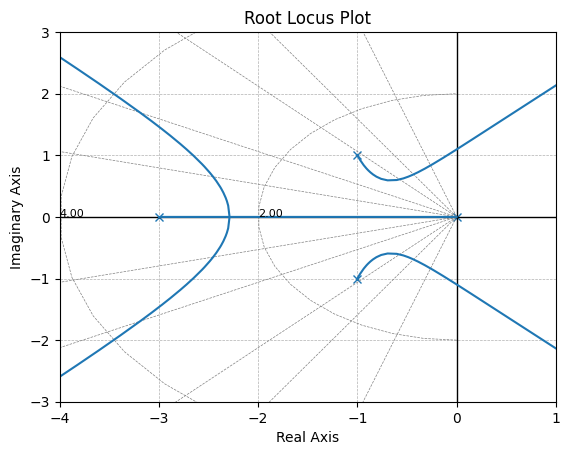

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function
numerator = [1]
denominator = [1, 5, 8, 6, 0]  # s^4 + 5s^3 + 8s^2 + 6s
system = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots()
rl, k = ctl.root_locus(system, plot=True, ax=ax)

# Improve plot aesthetics
ax.set_title('Root Locus Plot')
ax.set_xlabel('Real Axis')
ax.set_ylabel('Imaginary Axis')
ax.axhline(y=0, color='k', lw=1)
ax.axvline(x=0, color='k', lw=1)
ax.grid(True, which='both', ls='--', lw=0.5)

# Adjust plot limits if necessary
ax.set_xlim([-4, 1])
ax.set_ylim([-3, 3])

plt.show()

## Esempio 2

In questo esempio, approfondiamo l'applicazione dell'analisi del luogo delle radici per la progettazione di sistemi di controllo con parametri multipli. Ci concentreremo su un esempio specifico che coinvolge un sistema di controllo della posizione con feedback tachimetrico.

### Comprendere la configurazione del sistema

Consideriamo un sistema con una funzione di trasferimento ad anello aperto della forma:

$$ G(s) = K_A \cdot \frac{s}{s(s+2)} $$

Dove $ K_A $ è il guadagno dell'amplificatore. Il nostro obiettivo è progettare questo sistema per un valore specificato del rapporto di smorzamento $ \zeta $.


<table>
<tr>
    <td>
        <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_a_1.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_a_1" style="width:550px;"/>
    </td>
</tr>
</table>



### Risoluzione in una configurazione a ciclo singolo

La prima cosa che vogliamo fare è convertire il sistema in una configurazione a loop singolo:

$$ F(s) = \frac{K_A}{s^2 + (2 + K_A K_T) s} $$

Dove $ K_t $ rappresenta la costante tachimetrica.

<table>
<tr>
    <td>
        <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_a_2.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_a_2" style="width:550px;"/>
    </td>
</tr>
</table>

#### Determinazione dell'equazione caratteristica

L’equazione caratteristica di questo sistema è:

$$ s^2 + (2 + K_A K_T) s + K_A = 0 $$

Come abbiamo discusso, i poli e gli zeri del sistema potrebbero essere diversi da quelli ad anello aperto.

#### Passaggio 1: formulazione della funzione del luogo delle radici

Esprimiamo l'equazione caratteristica in una forma adatta per l'analisi del luogo delle radici:

Per fare ciò possiamo riscrivere l’equazione caratteristica in questa forma:

$$ s^2 + 2s + K_A + K_AK_T s = 0 $$


$$ K_A + K_AK_T s = -s^2 - 2s $$


$$ K_AK_T s = -s^2 - 2s -K_A$$

e infine possiamo scrivere l'equazione del luogo delle radici:

$$ 1 + \frac{K_A K_Ts}{s^2 + 2s + K_A} = 0 $$

Qui, $ K = K_A K_T $ funge da guadagno del luogo delle radici. Se ad esempio voglio capire come $K_T$ influenza le mie prestazioni, devo avere l'equazione in modo che $K_T$ sia il mio guadagno del luogo delle radici:

$$
1 + KF(s) = 0, \;\;\; K = K_A K_T
$$

### Problema di progettazione: specificare il rapporto di smorzamento

Supponiamo di avere $K_A=60$ e di voler progettare $K_T$ in modo che il sistema abbia un rapporto di smorzamento $ \zeta = 0,5 $.

Questo specializza la nostra equazione:

$$ 1 + \frac{60 K_Ts}{s^2 + 2s + 60} = 0 $$

#### Passaggio 1: schizzo del luogo delle radici

- Il grafico del luogo delle radici ci aiuta a visualizzare come si muovono i poli del sistema al variare di $ K $.
- Identifichiamo i poli, gli zeri e i punti di rottura sul luogo delle radici.

#### Passaggio 2: calcolo di $ K_T $ per lo smorzamento desiderato

- Disegniamo una linea nel piano s corrispondente a $ \zeta = 0,5 $.
- Trova l'intersezione di questa linea con il luogo delle radici per identificare il valore corrispondente di $ K $.
- Calcola $ K_T $ da $ K $ usando $ K_T = \frac{K}{K_A} $.


<table>
<tr>
    <td>
        <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_final_a_3.png" alt="22_Compensator_Design_Using_Root_Locus_example_final_a_3" style="width:550px;"/>
    </td>
</tr>
</table>

### Comprendere i contorni delle radici

I contorni delle radici rappresentano i grafici del luogo delle radici per vari valori di un parametro mantenendo costante l'altro. Questo concetto è cruciale per i sistemi con più parametri variabili.

#### Contorni radice per variare $ K_A $

- **Tracciamento dei contorni delle radici**: per ciascun valore di $ K_A $, traccia il luogo delle radici corrispondente.
- **Analisi**: Osserva come cambiano i rami del luogo delle radici con diversi valori di $ K_A $.


<table>
<tr>
    <td>
        <img src="../pics/22_Compensator_Design_Using_Root_Locus_example_root_contour.png" alt="22_Compensator_Design_Using_Root_Locus_example_root_contour" style="width:550px;"/>
    </td>
</tr>
</table>


Infatti la linea tratteggiata verticale nel diagramma sopra è il luogo delle radici dell'equazione:

$$
s^2 + 2s + K_A = 0
$$


Se hai più parametri come avevamo prima:

$$ 1 + \frac{K_A K_Ts}{s^2 + 2s + K_A} = 0 $$

1. Concentrati sul denominatore, che è funzione di un solo parametro. Le radici del denominatore sono i poli ad anello aperto della funzione totale.

 - Prima di tutto studia: $s^2 + 2s + K_A=0$, includendo se necessario (e potrebbe essere per una funzione complessa) mettilo nella forma del luogo delle radici:
 
 $$
 1 + \frac{K_A}{s(s+2)}
 $$
 
 e tracciare il luogo delle radici (che è una linea verticale tra 0 e -2).
 
2. Questo luogo delle radici fornisce i poli ad anello aperto per la funzione completa. Ciò significa che puoi prendere due punti qualsiasi su questo luogo delle radici e rappresentano i tuoi poli ad anello aperto (per un valore specifico del tuo parametro $K_A$).

3. Disegna il luogo delle radici per l'altro parametro ($K_T$ nel nostro caso).

## Analisi del luogo delle radici per sistemi con tempi morti

Ci occupiamo ora dell'analisi del luogo delle radici dei sistemi di controllo che includono tempi morti, uno scenario comune nelle applicazioni del mondo reale. Utilizzeremo l'approssimazione di Pade per semplificare l'elemento del tempo morto e analizzare il suo impatto sul grafico del luogo delle radici.

### Comprendere i tempi morti nei sistemi di controllo

Il tempo morto nei sistemi di controllo si riferisce a un ritardo tra la risposta di ingresso e quella di uscita. È spesso rappresentato da un termine come $ e^{-s\tau_D} $ nella funzione di trasferimento, dove $ \tau_D $ è il tempo morto.

#### Esempio: funzione di trasferimento con tempo morto

Consideriamo una funzione di trasferimento con tempi morti:

$$ G(s) = \frac{K \cdot e^{-s\tau_D} }{ s }$$

### Approssimazione del tempo morto: approssimazione di Pade

Il tempo morto può essere approssimato utilizzando l'approssimazione di Pade, che converte il ritardo esponenziale in una funzione razionale. L'approssimazione per un Pade del primo ordine è:

$$ e^{-s\tau_D} \approx \frac{1 - \frac{\tau_D}{2} s}{1 + \frac{\tau_D}{2} s} $$

### Trasformazione della funzione di trasferimento

Applicando l'approssimazione di Pade a $ G(s) $, la funzione di trasferimento diventa:

$$ G(s) = \frac{K}{s} \frac{1 - \frac{\tau_D}{2} s}{1 + \frac{\tau_D}{2} s} = -K \cdot \frac{s - \frac{2}{\tau_D}}{s(s + \frac{2}{\tau_D})} $$

Si noti il segno negativo che deriva dall'approssimazione.

Ciò corrisponde all'equazione:

$$
1-G(s) = 0
$$


#### Criteri di angolo e grandezza

- **Criterio di magnitudo**: rimane invariato; $ |G(s)| = 1$.
- **Criterio angolo**: modifica in base al segno negativo. Il criterio cambia da un multiplo dispari di 180 gradi a un multiplo pari:
  $$ \angle G(s) = \pm 2q \times 180^\circ $$
  
  Questo perché l'equazione ora è $G(s)=1$ (prima era $G(s)=-1$).
  

#### Costruire il luogo delle radici

1. **Identificare poli e zeri**:
   - Polo a $ s = 0 $
   - Zero a $ s = \frac{2}{\tau_D} $
   - Polo aggiuntivo a $ s = -\frac{2}{\tau_D} $ dovuto all'approssimazione di Pade.

2. **Tracciamento del luogo delle radici**:

Rispetto alle regole che abbiamo visto ci sono solo due modifiche:
   - I segmenti dell'asse reale che fanno parte del luogo delle radici cambiano a causa del segno negativo.
   - Utilizzare il criterio dell'angolo modificato per determinare quali segmenti dell'asse reale appartengono al luogo delle radici.

### Tracciamento del luogo delle radici con Python

Questo codice genera il grafico del luogo delle radici per un sistema con tempi morti, considerando le modifiche richieste a causa dell'approssimazione di Pade. Fornisce una rappresentazione visiva di come i poli del sistema si muovono nel piano complesso come guadagno $K$.

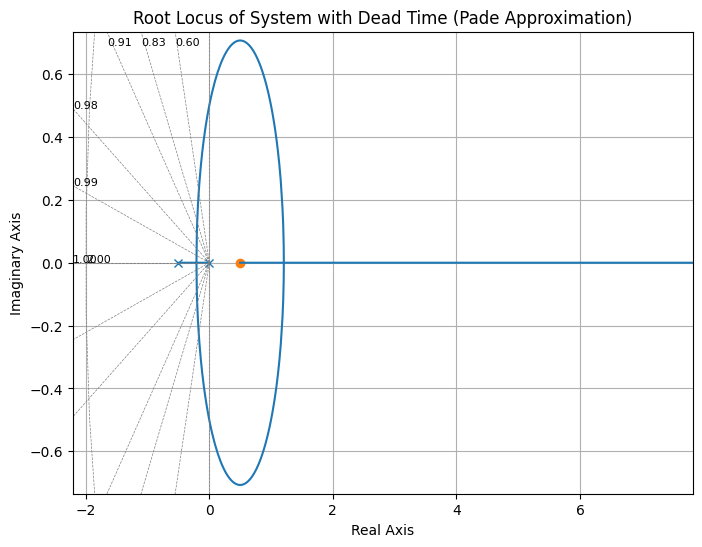

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the system parameters
K = -1  # Gain
tau_D = 1  # Dead time

# Transfer function with Pade's approximation for dead time
numerator = [1, -tau_D/2]
denominator = [1, tau_D/2, 0]

G_s = ctrl.TransferFunction(K * np.array(numerator), np.array(denominator))

# Plotting the root locus
plt.figure(figsize=(8, 6))
rlist, klist = ctrl.root_locus(G_s, plot=True)
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.title('Root Locus of System with Dead Time (Pade Approximation)')
plt.grid(True)
plt.show()
